# Phase 5 Capstone

# Predicting Obesity/ Obesity Prediction

- Student name: Lucas Wilkerson
- Student pace: Flex/part time
- Scheduled project review date/time:
- Instructor name: Morgan Jones

## Business Understanding 

## Data Understanding 

## Data Preparation

## Modeling

## Evaluation

## Deployment

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
# Importing standard Packages 
import pandas as pd
import numpy as np
import math 
import zipfile

# Importing packages for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Importing packages for statistics
import statsmodels.api as sm
import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import kstest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import RocCurveDisplay, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_curve, auc
from sklearn.metrics import log_loss, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE


import tensorflow as tf
from keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization, Activation
from keras import optimizers 
from keras.optimizers import Adam , SGD, RMSprop
from keras.metrics import Accuracy, Recall
from keras.utils import array_to_img, img_to_array, load_img
from keras import regularizers
from keras.regularizers import l1 , l2 
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

import os


2024-04-30 20:50:28.596646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Function to load dataset 

def load_csv_from_zip(zip_file_path, csv_file_name):
    
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Check if the CSV file exists in the zip file
        if csv_file_name in zip_ref.namelist():
            # Read the CSV file directly into a DataFrame
            with zip_ref.open(csv_file_name) as csv_file:
                df = pd.read_csv(csv_file)
                return df
        else:
            print(f"CSV file '{csv_file_name}' not found in the zip file.")
            return None

zip_file_path = "data/brfss2022.csv.zip"
csv_file_name = "brfss2022.csv"
df = load_csv_from_zip(zip_file_path, csv_file_name)
if df is not None:
    print("CSV file loaded successfully!")
    print(df.head())  # Display the first few rows of the DataFrame

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


CSV file loaded successfully!
   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  ...  _SMOKGRP  _LCSREC  DRNKANY6      DROCDY4_  \
0  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
1  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
2  2.022000e+09       1.0  ...       4.0      NaN       2.0  5.397605e-79   
3  2.022000e+09       1.0  ...       3.0      2.0       2.0  5.397605e-79   
4  2.022000e+09       1.0  ...       4.0      NaN       1.0  1.000000e+01   

   _RFBING6      _DRNKWK2  _RFDRHV8  _FLSHOT7  _PNEUMO3  _AIDTST4  


In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

# Loop through the columns to get column names and data types
for column in df.columns:
    print(column, df[column].dtype)

# Get unique values for each column
for column in df.columns:
    print(column, df[column].unique())

   _STATE  FMONTH    IDATE  IMONTH  IDAY  IYEAR  DISPCODE       SEQNO  \
0     1.0     1.0  2032022       2     3   2022    1100.0  2022000001   
1     1.0     1.0  2042022       2     4   2022    1100.0  2022000002   
2     1.0     1.0  2022022       2     2   2022    1100.0  2022000003   
3     1.0     1.0  2032022       2     3   2022    1100.0  2022000004   
4     1.0     1.0  2022022       2     2   2022    1100.0  2022000005   

           _PSU  CTELENM1  PVTRESD1  COLGHOUS  STATERE1  CELPHON1  LADULT1  \
0  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
1  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
2  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
3  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   
4  2.022000e+09       1.0       1.0       NaN       1.0       2.0      1.0   

   COLGSEX1  NUMADULT  LANDSEX1  NUMMEN  NUMWOMEN  RESPSLCT  SAFETIME  \
0       NaN       2

In [5]:
# Previewing df shape
print(df.shape)

#Printing out the total number of rows and columns in the BRFSS dataset
n_rows, n_cols = df.shape
print('The number of rows in the dataset is', n_rows)
print('The number of columns in the dataset is', n_cols)

(445132, 326)
The number of rows in the dataset is 445132
The number of columns in the dataset is 326


In [6]:
# Previewing general information on dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), int64(5)
memory usage: 1.1 GB
None


Looking at the initial dataset information, this dataset contains 445132 entries with a total of 326 columns with datatypes being integers and floats. While there are some numerical columns, a good amount of the columns are categoricla/numerical. The many columns represent  various health-related risk behaviors, chronic health conditions, demographics, location, and even the use of preventive services along with other variables. I plan to narrow down the columns for the dataset, choosing the ones relevant for this analysis. 

In [7]:
#Selecting a subset of relevant columns out of the 326 variables in the data for exploratory analysis----------------------
col_selected = [ #Record Identification/ Demographics----------------------------------------------------------------------
            '_STATE', '_SEX', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            '_BMI5', 'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', '_DRDXAR2', '_MICHD',  
            'DIABETE4',   
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6']


In [8]:
# Creating dataset of selected variables 
df_subset = df[col_selected].copy()
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _STATE    445132 non-null  float64
 1   _SEX      445132 non-null  float64
 2   _AGE80    445132 non-null  float64
 3   _AGE_G    445132 non-null  float64
 4   MARITAL   445124 non-null  float64
 5   _EDUCAG   445132 non-null  float64
 6   _INCOMG1  445132 non-null  float64
 7   VETERAN3  440959 non-null  float64
 8   EMPLOY1   438936 non-null  float64
 9   _CHLDCNT  445131 non-null  float64
 10  _METSTAT  435724 non-null  float64
 11  _URBSTAT  435724 non-null  float64
 12  _IMPRACE  445132 non-null  float64
 13  _RACE1    445130 non-null  float64
 14  _RACEPR1  445132 non-null  float64
 15  _HISPANC  445132 non-null  float64
 16  _BMI5     396326 non-null  float64
 17  GENHLTH   445129 non-null  float64
 18  _RFHLTH   445132 non-null  float64
 19  PHYSHLTH  445127 non-null  float64
 20  _PHY

In [9]:
#Previewing first 10 rows 
df_subset.head(10)


_STATE  _SEX  _AGE80  _AGE_G  MARITAL  _EDUCAG  _INCOMG1  VETERAN3  \
0     1.0   2.0    80.0     6.0      1.0      4.0       9.0       2.0   
1     1.0   2.0    80.0     6.0      3.0      2.0       3.0       2.0   
2     1.0   2.0    56.0     5.0      1.0      4.0       6.0       2.0   
3     1.0   2.0    73.0     6.0      1.0      2.0       9.0       2.0   
4     1.0   2.0    43.0     3.0      1.0      3.0       3.0       2.0   
5     1.0   1.0    80.0     6.0      1.0      2.0       9.0       2.0   
6     1.0   2.0    80.0     6.0      2.0      4.0       5.0       2.0   
7     1.0   2.0    80.0     6.0      3.0      2.0       5.0       2.0   
8     1.0   2.0    78.0     6.0      1.0      4.0       5.0       2.0   
9     1.0   2.0    72.0     6.0      1.0      4.0       5.0       2.0   

   EMPLOY1  _CHLDCNT  _METSTAT  _URBSTAT  _IMPRACE  _RACE1  _RACEPR1  \
0      7.0       1.0       1.0       1.0       1.0     1.0       1.0   
1      2.0       1.0       2.0       1.0       1.0     1.0       1.0   
2      7.0       1.0       1.0       1.0       1.0     1.0       1.0   
3      7.0       1.0       1.0       1.0       1.0     1.0       1.0   
4      5.0       1.0       1.0       1.0       1.0     1.0       1.0   
5      7.0       1.0       1.0       1.0       1.0     1.0       1.0   
6      7.0       1.0       1.0       1.0       2.0     2.0       2.0   
7      7.0       1.0       1.0       1.0       1.0     1.0       1.0   
8      1.0       1.0       1.0       1.0       1.0     1.0       1.0   
9      7.0       1.0       2.0       2.0       1.0     1.0       1.0   

   _HISPANC   _BMI5  GENHLTH  _RFHLTH  PHYSHLTH  _PHYS14D  MENTHLTH  _MENT14D  \
0       2.0     NaN      2.0      1.0      88.0       1.0      88.0       1.0   
1       2.0  2657.0      1.0      1.0      88.0       1.0      88.0       1.0   
2       2.0  2561.0      2.0      1.0       2.0       2.0       3.0       2.0   
3       2.0  2330.0      1.0      1.0      88.0       1.0      88.0       1.0   
4       2.0  2177.0      4.0      2.0       2.0       2.0      88.0       1.0   
5       2.0  2608.0      5.0      2.0       1.0       2.0      88.0       1.0   
6       2.0  2296.0      2.0      1.0      88.0       1.0      88.0       1.0   
7       2.0  2781.0      3.0      1.0      88.0       1.0      88.0       1.0   
8       2.0     NaN      3.0      1.0      88.0       1.0      88.0       1.0   
9       2.0  2905.0      3.0      1.0       1.0       2.0      88.0       1.0   

   EXERANY2  _TOTINDA  SLEPTIM1  _HLTHPLN  PERSDOC3  CHECKUP1  ADDEPEV3  \
0       2.0       2.0       8.0       9.0       1.0       1.0       2.0   
1       2.0       2.0       6.0       1.0       2.0       8.0       2.0   
2       1.0       1.0       5.0       1.0       1.0       1.0       2.0   
3       1.0       1.0       7.0       9.0       1.0       1.0       2.0   
4       1.0       1.0       9.0       1.0       2.0       1.0       2.0   
5       2.0       2.0       7.0       1.0       1.0       1.0       2.0   
6       1.0       1.0       7.0       1.0       1.0       1.0       2.0   
7       2.0       2.0       8.0       1.0       1.0       1.0       2.0   
8       1.0       1.0       6.0       1.0       1.0       1.0       2.0   
9       1.0       1.0       7.0       1.0       1.0       1.0       2.0   

   _DRDXAR2  _MICHD  DIABETE4  _SMOKER3  _CURECI2  DRNKANY6  _RFBING6  
0       2.0     2.0       1.0       4.0       1.0       2.0       1.0  
1       2.0     2.0       3.0       4.0       1.0       2.0       1.0  
2       2.0     2.0       3.0       4.0       1.0       2.0       1.0  
3       1.0     2.0       3.0       2.0       1.0       2.0       1.0  
4       2.0     2.0       3.0       4.0       1.0       1.0       1.0  
5       2.0     1.0       1.0       4.0       1.0       2.0       1.0  
6       2.0     2.0       3.0       3.0       1.0       1.0       1.0  
7       1.0     2.0       3.0       4.0       1.0       2.0       1.0  
8       1.0     2.0       3.0       3.0 

# Splitting data into train and test groups 

## Creating target variable column prior to splitting
## Splitting prior to pre processing to avoid data leakage or negatively impacting performance

In [10]:
# Define a threshold for obesity and for overweight 
obesity_threshold = 30.0  # BMI greater than or equal to 30 is considered obese
overweight_threshold = 25.0  # BMI greater than or equal to 25 is considered overweight 

# Create a new column indicating whether each BMI value is obese or not
df_subset['Obese'] = (df_subset["_BMI5"] * 0.01) >= obesity_threshold
df_subset['Overweight'] = (df_subset["_BMI5"] * 0.01) >= overweight_threshold

# Convert boolean values to binary (1 for obese, 0 for not obese)
df_subset['Obese'] = df_subset['Obese'].astype(int)
df_subset['Overweight'] = df_subset['Overweight'].astype(int)

print(df_subset.info())
print(df_subset.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      445132 non-null  float64
 1   _SEX        445132 non-null  float64
 2   _AGE80      445132 non-null  float64
 3   _AGE_G      445132 non-null  float64
 4   MARITAL     445124 non-null  float64
 5   _EDUCAG     445132 non-null  float64
 6   _INCOMG1    445132 non-null  float64
 7   VETERAN3    440959 non-null  float64
 8   EMPLOY1     438936 non-null  float64
 9   _CHLDCNT    445131 non-null  float64
 10  _METSTAT    435724 non-null  float64
 11  _URBSTAT    435724 non-null  float64
 12  _IMPRACE    445132 non-null  float64
 13  _RACE1      445130 non-null  float64
 14  _RACEPR1    445132 non-null  float64
 15  _HISPANC    445132 non-null  float64
 16  _BMI5       396326 non-null  float64
 17  GENHLTH     445129 non-null  float64
 18  _RFHLTH     445132 non-null  float64
 19  PH

In [11]:
# Copying full df
df_subset_orginal = df_subset.copy()
# copying train dataset to label as subset
#df_subset= df_train.copy()

In [12]:
# Separate features and target variable
X = df_subset.drop(['Obese'], axis=1)
y = df_subset['Obese']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [13]:
# Concatenating x and y train for processesing
df_train = pd.concat([X_train, y_train], axis=1)
X_train = df_train.copy()

In [14]:
# Compute missing values for each column
percent_missing = ((X_train.isnull() | X_train.isna()).sum() * 100 / len(df)).round(2)
X_train_missing_value = pd.DataFrame({'column_name': X_train.columns,
                                     'percent_missing': percent_missing})
print("Missing values for DataFrame:")
print(X_train_missing_value)
print()


Missing values for DataFrame:
           column_name  percent_missing
_STATE          _STATE             0.00
_SEX              _SEX             0.00
_AGE80          _AGE80             0.00
_AGE_G          _AGE_G             0.00
MARITAL        MARITAL             0.00
_EDUCAG        _EDUCAG             0.00
_INCOMG1      _INCOMG1             0.00
VETERAN3      VETERAN3             0.71
EMPLOY1        EMPLOY1             1.06
_CHLDCNT      _CHLDCNT             0.00
_METSTAT      _METSTAT             1.58
_URBSTAT      _URBSTAT             1.58
_IMPRACE      _IMPRACE             0.00
_RACE1          _RACE1             0.00
_RACEPR1      _RACEPR1             0.00
_HISPANC      _HISPANC             0.00
_BMI5            _BMI5             8.21
GENHLTH        GENHLTH             0.00
_RFHLTH        _RFHLTH             0.00
PHYSHLTH      PHYSHLTH             0.00
_PHYS14D      _PHYS14D             0.00
MENTHLTH      MENTHLTH             0.00
_MENT14D      _MENT14D             0.00
EXERANY2  

In [15]:
#Inspecting unique values and value counts for all variables
for col in X_train:
    print(f"{col} - unique values: ")
    print(df_subset[col].unique(), "\n")
    print("------------------------------------")

_STATE - unique values: 
[ 1.  2.  4.  5.  6.  8.  9. 10. 11. 12. 13. 15. 16. 17. 18. 19. 20. 21.
 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39.
 40. 41. 42. 44. 45. 46. 47. 48. 49. 50. 51. 53. 54. 55. 56. 66. 72. 78.] 

------------------------------------
_SEX - unique values: 
[2. 1.] 

------------------------------------
_AGE80 - unique values: 
[80. 56. 73. 43. 78. 72. 57. 65. 70. 62. 63. 67. 79. 68. 66. 76. 74. 51.
 71. 61. 64. 60. 52. 69. 46. 58. 38. 77. 59. 54. 75. 35. 55. 45. 44. 50.
 47. 53. 40. 49. 28. 30. 48. 41. 42. 36. 31. 33. 27. 26. 29. 34. 20. 19.
 37. 25. 32. 18. 24. 23. 39. 22. 21.] 

------------------------------------
_AGE_G - unique values: 
[6. 5. 3. 4. 2. 1.] 

------------------------------------
MARITAL - unique values: 
[ 1.  3.  2.  4.  5.  6.  9. nan] 

------------------------------------
_EDUCAG - unique values: 
[4. 2. 3. 1. 9.] 

------------------------------------
_INCOMG1 - unique values: 
[9. 3. 6. 5. 4. 2. 1. 7.] 

-----

In [16]:
# checking for null
pd.set_option('display.max_rows', 500)
print(X_train.isna().sum())

_STATE            0
_SEX              0
_AGE80            0
_AGE_G            0
MARITAL           6
_EDUCAG           0
_INCOMG1          0
VETERAN3       3165
EMPLOY1        4706
_CHLDCNT          0
_METSTAT       7026
_URBSTAT       7026
_IMPRACE          0
_RACE1            2
_RACEPR1          0
_HISPANC          0
_BMI5         36544
GENHLTH           1
_RFHLTH           0
PHYSHLTH          4
_PHYS14D          0
MENTHLTH          1
_MENT14D          0
EXERANY2          1
_TOTINDA          0
SLEPTIM1          1
_HLTHPLN          0
PERSDOC3          1
CHECKUP1          2
ADDEPEV3          3
_DRDXAR2       1980
_MICHD         3774
DIABETE4          2
_SMOKER3          0
_CURECI2          0
DRNKANY6          0
_RFBING6          0
Overweight        0
Obese             0
dtype: int64


In [17]:
# Checking for duplicates
print(X_train.duplicated().sum())
X_train.drop_duplicates(inplace=True)
print(X_train.duplicated().sum())


12
0


## Imputing/ Fill NA's 
### X_train

In [18]:
# Imputing missing values for numerical variables with median
numerical_cols = ['_BMI5']
for col in numerical_cols:
    median_val = X_train[col].median()
    X_train[col].fillna(median_val, inplace=True)

print(X_train.info())
print(X_train.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 333837 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      333837 non-null  float64
 1   _SEX        333837 non-null  float64
 2   _AGE80      333837 non-null  float64
 3   _AGE_G      333837 non-null  float64
 4   MARITAL     333831 non-null  float64
 5   _EDUCAG     333837 non-null  float64
 6   _INCOMG1    333837 non-null  float64
 7   VETERAN3    330674 non-null  float64
 8   EMPLOY1     329133 non-null  float64
 9   _CHLDCNT    333837 non-null  float64
 10  _METSTAT    326811 non-null  float64
 11  _URBSTAT    326811 non-null  float64
 12  _IMPRACE    333837 non-null  float64
 13  _RACE1      333835 non-null  float64
 14  _RACEPR1    333837 non-null  float64
 15  _HISPANC    333837 non-null  float64
 16  _BMI5       333837 non-null  float64
 17  GENHLTH     333836 non-null  float64
 18  _RFHLTH     333837 non-null  float64
 19  PHY

In [77]:
print(median_val)
train_median_bmi = median_val

2744.0


In [19]:
# Dropping rest of Na Values as they are a very low percentage 
X_train = X_train.dropna().copy()

# Verify if there are any missing values remaining
missing_values = X_train.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

print(X_train.isna().sum())

print(X_train.info())

Remaining missing values:
 Series([], dtype: int64)
_STATE        0
_SEX          0
_AGE80        0
_AGE_G        0
MARITAL       0
_EDUCAG       0
_INCOMG1      0
VETERAN3      0
EMPLOY1       0
_CHLDCNT      0
_METSTAT      0
_URBSTAT      0
_IMPRACE      0
_RACE1        0
_RACEPR1      0
_HISPANC      0
_BMI5         0
GENHLTH       0
_RFHLTH       0
PHYSHLTH      0
_PHYS14D      0
MENTHLTH      0
_MENT14D      0
EXERANY2      0
_TOTINDA      0
SLEPTIM1      0
_HLTHPLN      0
PERSDOC3      0
CHECKUP1      0
ADDEPEV3      0
_DRDXAR2      0
_MICHD        0
DIABETE4      0
_SMOKER3      0
_CURECI2      0
DRNKANY6      0
_RFBING6      0
Overweight    0
Obese         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 316858 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      316858 non-null  float64
 1   _SEX        316858 non-null  float64
 2   _AGE80      316858 non-null 

In [20]:
# Previewing training set
X_train.head(10)

_STATE  _SEX  _AGE80  _AGE_G  MARITAL  _EDUCAG  _INCOMG1  VETERAN3  \
383796    51.0   2.0    48.0     4.0      1.0      4.0       5.0       2.0   
390262    53.0   2.0    72.0     6.0      1.0      4.0       6.0       2.0   
298686    39.0   1.0    51.0     4.0      1.0      4.0       7.0       2.0   
407789    53.0   1.0    41.0     3.0      1.0      4.0       7.0       2.0   
430337    55.0   1.0    41.0     3.0      5.0      2.0       2.0       2.0   
150143    23.0   1.0    79.0     6.0      1.0      4.0       9.0       1.0   
291604    39.0   1.0    54.0     4.0      2.0      3.0       5.0       2.0   
210121    28.0   2.0    29.0     2.0      5.0      2.0       5.0       2.0   
293302    39.0   1.0    31.0     2.0      5.0      3.0       1.0       2.0   
66970     12.0   2.0    67.0     6.0      3.0      3.0       5.0       2.0   

        EMPLOY1  _CHLDCNT  _METSTAT  _URBSTAT  _IMPRACE  _RACE1  _RACEPR1  \
383796      1.0       1.0       1.0       1.0       2.0     2.0       2.0   
390262      7.0       1.0       1.0       1.0       1.0     1.0       1.0   
298686      1.0       3.0       1.0       1.0       6.0     7.0       6.0   
407789      1.0       4.0       1.0       1.0       1.0     1.0       1.0   
430337      1.0       5.0       1.0       1.0       1.0     1.0       1.0   
150143      7.0       1.0       2.0       2.0       1.0     1.0       1.0   
291604      1.0       1.0       2.0       1.0       1.0     1.0       1.0   
210121      1.0       1.0       2.0       2.0       2.0     2.0       2.0   
293302      8.0       1.0       1.0       1.0       1.0     1.0       1.0   
66970       1.0       2.0       1.0       1.0       1.0     1.0       1.0   

        _HISPANC   _BMI5  GENHLTH  _RFHLTH  PHYSHLTH  _PHYS14D  MENTHLTH  \
383796       2.0  2661.0      4.0      2.0      88.0       1.0       3.0   
390262       2.0  2744.0      2.0      1.0      88.0       1.0      88.0   
298686       2.0  2875.0      3.0      1.0      88.0       1.0      88.0   
407789       2.0  2125.0      2.0      1.0      88.0       1.0      10.0   
430337       2.0  4229.0      3.0      1.0       2.0       2.0      30.0   
150143       2.0  2669.0      5.0      2.0      30.0       3.0      30.0   
291604       2.0  3289.0      2.0      1.0      88.0       1.0      88.0   
210121       2.0  2923.0      3.0      1.0       4.0       2.0       6.0   
293302       2.0  2663.0      4.0      2.0      20.0       3.0      15.0   
66970        2.0  1856.0      2.0      1.0      88.0       1.0       7.0   

        _MENT14D  EXERANY2  _TOTINDA  SLEPTIM1  _HLTHPLN  PERSDOC3  CHECKUP1  \
383796       2.0       1.0       1.0       7.0       1.0       2.0       1.0   
390262       1.0       1.0       1.0       8.0       1.0       1.0       2.0   
298686       1.0       1.0       1.0       5.0       1.0       1.0       1.0   
407789       2.0       1.0       1.0       7.0       1.0       1.0       2.0   
430337       3.0       1.0       1.0       5.0       1.0       3.0       4.0   
150143       3.0       2.0       2.0       9.0       1.0       2.0       1.0   
291604       1.0       1.0       1.0       8.0       1.0       3.0       2.0   
210121       2.0       1.0       1.0       6.0       1.0       1.0       1.0   
293302       3.0       1.0       1.0       4.0       1.0       3.0       1.0   
66970        2.0       1.0       1.0       6.0       1.0       1.0       1.0   

        ADDEPEV3  _DRDXAR2  _MICHD  DIABETE4  _SMOKER3  _CURECI2  DRNKANY6  \
383796       2.0       1.0     2.0       3.0       4.0       1.0       1.0   
390262       2.0       1.0     2.0       3.0       4.0       1.0       1.0   
298686       2.0       2.0     2.0       3.0       4.0       1.0       1.0   
407789       2.0       2.0     2.0       3.0       4.0       1.0       1.0   
430337       2.0       1.0     2.0       3.0       1.0       2.0       1.0   
150143       1.0       1.0     1.0       3.0       4.0       1.0       2.0   
291604       2.0       2.0     2.0   

# Give observation
After adjusting for obvious missing values through dropping or value imputation the dataset is now at 445115 entries with 36 columns. 

In [21]:
# Inspecting unique values and value counts for all variables
for col in X_train.columns:
    print(f"{col} - unique values and counts:")
    unique_values = X_train[col].unique()
    for value in unique_values:
        count = X_train[col].value_counts()[value]
        print(f"Value: {value}, Count: {count}")
    print("------------------------------------")

_STATE - unique values and counts:
Value: 51.0, Count: 7530
Value: 53.0, Count: 19077
Value: 39.0, Count: 12067
Value: 55.0, Count: 8289
Value: 23.0, Count: 7893
Value: 28.0, Count: 3145
Value: 12.0, Count: 9639
Value: 26.0, Count: 7242
Value: 2.0, Count: 4125
Value: 27.0, Count: 12212
Value: 41.0, Count: 4205
Value: 1.0, Count: 3309
Value: 30.0, Count: 5130
Value: 19.0, Count: 6586
Value: 16.0, Count: 4611
Value: 42.0, Count: 3378
Value: 34.0, Count: 5870
Value: 22.0, Count: 4094
Value: 17.0, Count: 3017
Value: 50.0, Count: 6416
Value: 46.0, Count: 5436
Value: 37.0, Count: 3297
Value: 18.0, Count: 7546
Value: 45.0, Count: 7236
Value: 49.0, Count: 7163
Value: 48.0, Count: 10247
Value: 24.0, Count: 11859
Value: 9.0, Count: 6990
Value: 25.0, Count: 8056
Value: 36.0, Count: 12759
Value: 35.0, Count: 3443
Value: 38.0, Count: 3035
Value: 56.0, Count: 3048
Value: 13.0, Count: 6662
Value: 33.0, Count: 4932
Value: 6.0, Count: 7919
Value: 40.0, Count: 4100
Value: 11.0, Count: 2336
Value: 4.0, C

Upon inspection of the codebook for the variables, certain variables will have placeholder values such as 9 or 99 and others. I plan to go through the variables and eliminatent these placeholders values that are being used for missing values. 

## Dropping placeholder values from X_train

In [22]:
X_train_main = X_train.copy()

In [23]:
X_train = X_train_main.copy()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316858 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE      316858 non-null  float64
 1   _SEX        316858 non-null  float64
 2   _AGE80      316858 non-null  float64
 3   _AGE_G      316858 non-null  float64
 4   MARITAL     316858 non-null  float64
 5   _EDUCAG     316858 non-null  float64
 6   _INCOMG1    316858 non-null  float64
 7   VETERAN3    316858 non-null  float64
 8   EMPLOY1     316858 non-null  float64
 9   _CHLDCNT    316858 non-null  float64
 10  _METSTAT    316858 non-null  float64
 11  _URBSTAT    316858 non-null  float64
 12  _IMPRACE    316858 non-null  float64
 13  _RACE1      316858 non-null  float64
 14  _RACEPR1    316858 non-null  float64
 15  _HISPANC    316858 non-null  float64
 16  _BMI5       316858 non-null  float64
 17  GENHLTH     316858 non-null  float64
 18  _RFHLTH     316858 non-null  float64
 19  PHY

In [24]:
X_train1 = X_train[['_HLTHPLN', 'DRNKANY6', '_RFBING6', '_EDUCAG',
                   '_CURECI2', '_SMOKER3', 'CHECKUP1', 'ADDEPEV3',
                   'DIABETE4', 'PERSDOC3', 'EXERANY2', '_TOTINDA', 
                    '_PHYS14D', '_MENT14D', '_RFHLTH', 'GENHLTH', 
                    '_HISPANC', '_CHLDCNT', 'VETERAN3', 'MARITAL']]

print(X_train1.info())

X_train2 = X_train[['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1']]

print(X_train2.info())

X_train3 = X_train[['_INCOMG1', 'EMPLOY1', '_RACE1']]

print(X_train3.info())

X_train4 = X_train.drop(columns = ['_INCOMG1', 'EMPLOY1', '_RACE1', 'MENTHLTH', 
                                   'PHYSHLTH', 'SLEPTIM1', '_HLTHPLN', 'DRNKANY6', 
                                   '_RFBING6', '_EDUCAG', '_CURECI2', '_SMOKER3', 
                                   'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'PERSDOC3', 
                                   'EXERANY2', '_TOTINDA', '_PHYS14D', '_MENT14D', 
                                   '_RFHLTH', 'GENHLTH', '_HISPANC', '_CHLDCNT', 
                                   'VETERAN3','MARITAL'], axis = 1)

print(X_train4.info())

<class 'pandas.core.frame.DataFrame'>
Index: 316858 entries, 383796 to 36923
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   _HLTHPLN  316858 non-null  float64
 1   DRNKANY6  316858 non-null  float64
 2   _RFBING6  316858 non-null  float64
 3   _EDUCAG   316858 non-null  float64
 4   _CURECI2  316858 non-null  float64
 5   _SMOKER3  316858 non-null  float64
 6   CHECKUP1  316858 non-null  float64
 7   ADDEPEV3  316858 non-null  float64
 8   DIABETE4  316858 non-null  float64
 9   PERSDOC3  316858 non-null  float64
 10  EXERANY2  316858 non-null  float64
 11  _TOTINDA  316858 non-null  float64
 12  _PHYS14D  316858 non-null  float64
 13  _MENT14D  316858 non-null  float64
 14  _RFHLTH   316858 non-null  float64
 15  GENHLTH   316858 non-null  float64
 16  _HISPANC  316858 non-null  float64
 17  _CHLDCNT  316858 non-null  float64
 18  VETERAN3  316858 non-null  float64
 19  MARITAL   316858 non-null  float64
dtypes: fl

In [25]:
# Looping through columns to remove placeholder values 
for col in X_train1.columns:
    X_train1 = X_train1[X_train1[col] != 7777.0]
    X_train1 = X_train1[X_train1[col] != 9999.0]
    X_train1 = X_train1[X_train1[col] != 77.0]
    X_train1 = X_train1[X_train1[col] != 99.0]
    X_train1 = X_train1[X_train1[col] != 9.0]
    X_train1 = X_train1[X_train1[col] != 7.0]
    X_train1 = X_train1[X_train1[col] != 9900.0]
    

for col in X_train2.columns:
    X_train2 = X_train2[X_train2[col] != 77.0]
    X_train2 = X_train2[X_train2[col] != 99.0]


for col in X_train3.columns:
    X_train3 = X_train3[X_train3[col] != 9.0]
 


X_train_no_na = pd.concat([X_train1, X_train2, X_train3, X_train4], axis=1)

# Print information 
print(X_train_no_na.info())


# Drop rows with NaNs in the specified columns
#X_train.dropna(subset=columns_to_replace_copy2, inplace=True)



<class 'pandas.core.frame.DataFrame'>
Index: 316858 entries, 383796 to 197189
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    252090 non-null  float64
 1   DRNKANY6    252090 non-null  float64
 2   _RFBING6    252090 non-null  float64
 3   _EDUCAG     252090 non-null  float64
 4   _CURECI2    252090 non-null  float64
 5   _SMOKER3    252090 non-null  float64
 6   CHECKUP1    252090 non-null  float64
 7   ADDEPEV3    252090 non-null  float64
 8   DIABETE4    252090 non-null  float64
 9   PERSDOC3    252090 non-null  float64
 10  EXERANY2    252090 non-null  float64
 11  _TOTINDA    252090 non-null  float64
 12  _PHYS14D    252090 non-null  float64
 13  _MENT14D    252090 non-null  float64
 14  _RFHLTH     252090 non-null  float64
 15  GENHLTH     252090 non-null  float64
 16  _HISPANC    252090 non-null  float64
 17  _CHLDCNT    252090 non-null  float64
 18  VETERAN3    252090 non-null  float64
 19  MA

In [26]:
# Drop rows with NaNs in the specified columns
X_train_no_na.dropna(inplace=True)
X_train_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

In [27]:
# Inspecting unique values and value counts for all variables
for col in X_train_no_na.columns:
    print(f"{col} - unique values and counts:")
    unique_values = X_train_no_na[col].unique()
    for value in unique_values:
        count = X_train_no_na[col].value_counts()[value]
        print(f"Value: {value}, Count: {count}")
    print("------------------------------------")

_HLTHPLN - unique values and counts:
Value: 1.0, Count: 199656
Value: 2.0, Count: 9749
------------------------------------
DRNKANY6 - unique values and counts:
Value: 1.0, Count: 117064
Value: 2.0, Count: 92341
------------------------------------
_RFBING6 - unique values and counts:
Value: 1.0, Count: 176775
Value: 2.0, Count: 32630
------------------------------------
_EDUCAG - unique values and counts:
Value: 4.0, Count: 95796
Value: 2.0, Count: 47015
Value: 3.0, Count: 57500
Value: 1.0, Count: 9094
------------------------------------
_CURECI2 - unique values and counts:
Value: 1.0, Count: 198275
Value: 2.0, Count: 11130
------------------------------------
_SMOKER3 - unique values and counts:
Value: 4.0, Count: 124690
Value: 1.0, Count: 18220
Value: 2.0, Count: 6892
Value: 3.0, Count: 59603
------------------------------------
CHECKUP1 - unique values and counts:
Value: 1.0, Count: 166929
Value: 2.0, Count: 20304
Value: 4.0, Count: 9028
Value: 3.0, Count: 12156
Value: 8.0, Count:

In [28]:
# Creating Adjusted BMI column rounded to two decimal places
X_train_no_na['BMI'] = round(X_train_no_na['_BMI5'] * 0.01, 2)
# 88 is labeled a 0 days planning to replace all rows with values of 88 to 0
# Replacing placeholder values with NaN
placeholders = [88.0]
for col in X_train_no_na[['MENTHLTH', 'PHYSHLTH']]:
    X_train_no_na[col].replace(placeholders, 0 , inplace=True)

X_train_no_na.drop(columns = ['_BMI5'], inplace = True)
X_train_no_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

In [29]:
# Creating final clean train dataset
X_train_clean = X_train_no_na.copy()
X_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

In [30]:
# Setting X_train
X_train = X_train_clean.copy()

In [31]:
# Setting whole training set
df_clean_train = X_train.copy()
df_clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  EXERANY2    209405 non-null  float64
 11  _TOTINDA    209405 non-null  float64
 12  _PHYS14D    209405 non-null  float64
 13  _MENT14D    209405 non-null  float64
 14  _RFHLTH     209405 non-null  float64
 15  GENHLTH     209405 non-null  float64
 16  _HISPANC    209405 non-null  float64
 17  _CHLDCNT    209405 non-null  float64
 18  VETERAN3    209405 non-null  float64
 19  MAR

The final cleaned training set has 209405 entries with 38 columns, The target variable for analysis is whether an individual has obesity or not. A new column ("Obese") was created for this variable.

# Dataset now final 

In [32]:
# Generating basic descriptive statistics of the numerica variables of the dataset 
df_clean_train.describe()

_HLTHPLN       DRNKANY6       _RFBING6        _EDUCAG  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        1.046556       1.440968       1.155822       3.146095   
std         0.210686       0.496504       0.362688       0.913431   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       2.000000   
50%         1.000000       1.000000       1.000000       3.000000   
75%         1.000000       2.000000       1.000000       4.000000   
max         2.000000       2.000000       2.000000       4.000000   

            _CURECI2       _SMOKER3       CHECKUP1       ADDEPEV3  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        1.053151       3.388520       1.375426       1.782006   
std         0.224334       0.908543       0.898567       0.412884   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       3.000000       1.000000       2.000000   
50%         1.000000       4.000000       1.000000       2.000000   
75%         1.000000       4.000000       1.000000       2.000000   
max         2.000000       4.000000       8.000000       2.000000   

            DIABETE4       PERSDOC3       EXERANY2       _TOTINDA  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        2.742380       1.548449       1.219675       1.219675   
std         0.711084       0.693564       0.414027       0.414027   
min         1.000000       1.000000       1.000000       1.000000   
25%         3.000000       1.000000       1.000000       1.000000   
50%         3.000000       1.000000       1.000000       1.000000   
75%         3.000000       2.000000       1.000000       1.000000   
max         4.000000       3.000000       2.000000       2.000000   

            _PHYS14D       _MENT14D        _RFHLTH        GENHLTH  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        1.515069       1.542876       1.162938       2.519152   
std         0.709762       0.720309       0.369310       1.026777   
min         1.000000       1.000000       1.000000       1.000000   
25%         1.000000       1.000000       1.000000       2.000000   
50%         1.000000       1.000000       1.000000       2.000000   
75%         2.000000       2.000000       1.000000       3.000000   
max         3.000000       3.000000       2.000000       5.000000   

            _HISPANC       _CHLDCNT       VETERAN3        MARITAL  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        1.921105       1.505781       1.873317       2.269053   
std         0.269575       0.986423       0.332618       1.683300   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000       2.000000       1.000000   
50%         2.000000       1.000000       2.000000       1.000000   
75%         2.000000       2.000000       2.000000       3.000000   
max         2.000000       6.000000       2.000000       6.000000   

            MENTHLTH       PHYSHLTH       SLEPTIM1       _INCOMG1  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        4.353048       4.187016       7.012340       4.539992   
std         8.206379       8.449186       1.427754       1.578637   
min         0.000000       0.000000       1.000000       1.000000   
25%         0.000000       0.000000       6.000000       3.000000   
50%         0.000000       0.000000       7.000000       5.000000   
75%         5.000000       3.000000       8.000000       6.000000   
max        30.000000      30.000000      24.000000       7.000000   

             EMPLOY1         _RACE1         _STATE           _SEX  \
count  209405.000000  209405.000000  209405.000000  209405.000000   
mean        3.608495       1.890050      30.229020       1.521339   
std         2.847942       2.079406      15.667746       0.499546   
min 

Looking at the general descriptive statistics we can make the following brief observations: 

- Regarding mental and physical health, individuals participating in this survey reported experiencing on average ~ 4 days of poor mental health and ~4 days poor physical health over their last 30 days.
- The average sleep time reported was ~7 hours per night.
- The average BMI of the participants of this survey was ~28.41 which would land in the BMI category of Overweight (25.0-29.9) with the median BMI value being 27.44, also in the Overweight category. 

There are a good amount of categorical variables within this dataset so futher exploration of these variables will continue below with visualizations to gather insight on the distributions. 

# Visualization

## Obesity, Overweight and BMI Distributions

First I plan to explore the target variable of Obesity and the variable of Overweight to get a sense of what those counts look like. Then I plan to look at the spread of BMI values in general over the whole dataset. 

# Getting value counts for Obesity and Overweight 


In [33]:
# Getting value counts for Obesity and Overweight 

print('Raw counts: \n')
print(df_clean_train['Obese'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean_train['Obese'].value_counts(normalize=True))

print('-----------------------------------')


print('Raw counts: \n')
print(df_clean_train['Overweight'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df_clean_train['Overweight'].value_counts(normalize=True))



Raw counts: 

Obese
0    139429
1     69976
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

Obese
0    0.665834
1    0.334166
Name: proportion, dtype: float64
-----------------------------------
Raw counts: 

Overweight
1    141592
0     67813
Name: count, dtype: int64
-----------------------------------
Normalized counts: 

Overweight
1    0.676163
0    0.323837
Name: proportion, dtype: float64


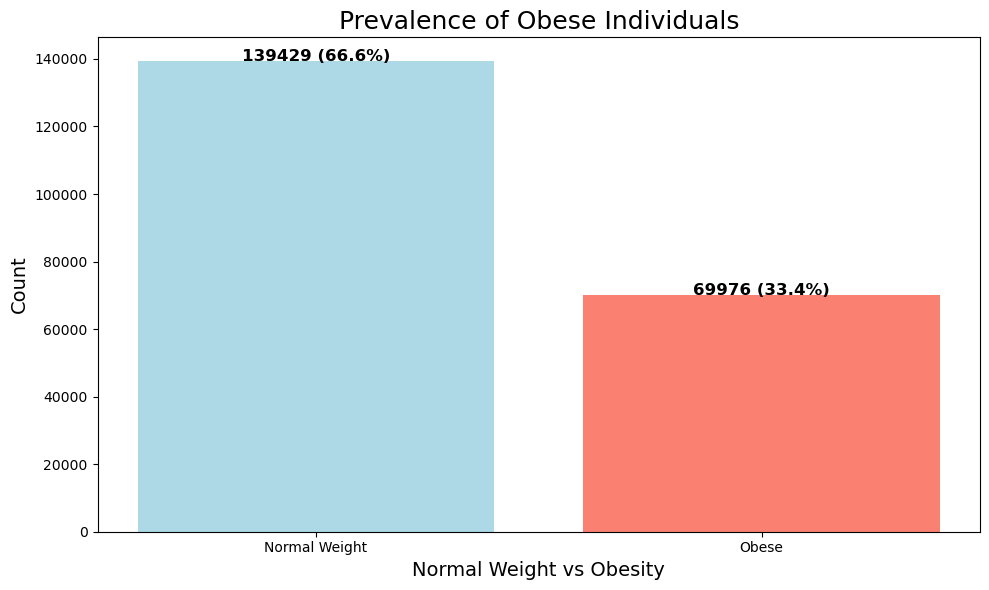

In [34]:
# Plotting visual for target variable of Obesity
outcome_counts = df_clean_train['Obese'].value_counts()

# Calculate percentages
total = outcome_counts.sum()
percentages = [count / total * 100 for count in outcome_counts]

# Define colors and labels
colors = ['lightblue', 'salmon']
labels = ['Normal Weight', 'Obese']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Normal Weight vs Obesity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Prevalence of Obese Individuals', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


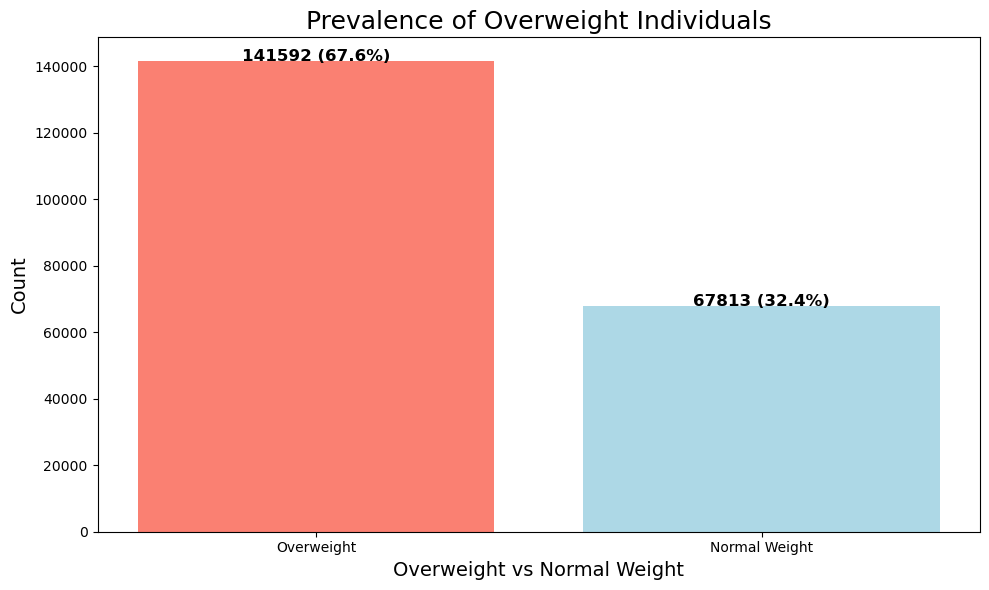

In [35]:
# Plotting visual for Overweight variable
outcome_counts_overweight = df_clean_train['Overweight'].value_counts()

# Calculate percentages
total = outcome_counts_overweight.sum()
percentages = [count / total * 100 for count in outcome_counts_overweight]

# Define colors and labels
colors = ['salmon', 'lightblue']
labels = ['Overweight', 'Normal Weight']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_overweight.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_overweight, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Overweight vs Normal Weight', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Prevalence of Overweight Individuals', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


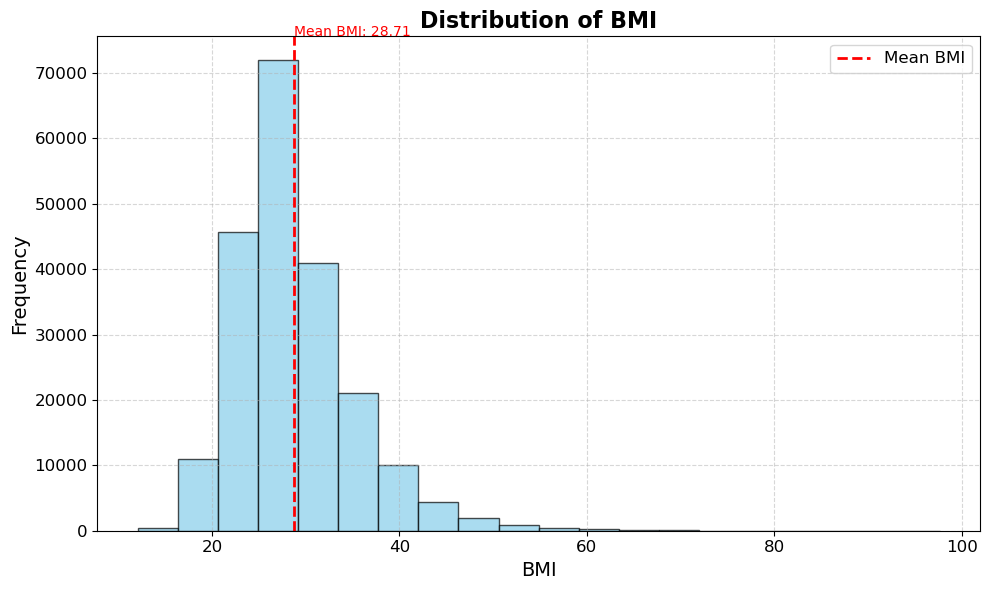

In [48]:
# Plotting Distributions for BMI
# Define column name
column_name = 'BMI'

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of BMI', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean BMI')
plt.legend(fontsize=12)
plt.text(df_clean_train[column_name].mean(), plt.gca().get_ylim()[1],
         f"Mean BMI: {df_clean_train[column_name].mean() :.2f}", fontsize=10, color='red')
plt.tight_layout()
plt.show()

Upon observation of the distribution, the majority of values seem to be between BMI values of 20 to 40 with the heaviest concentration being around the mid to upper 20s. To be classified as overweight BMI has to be 25.0 or over and to be classified as obese BMI has to be 30.0 or over. 

## Physical, Mental and Lifestyle Health Factors

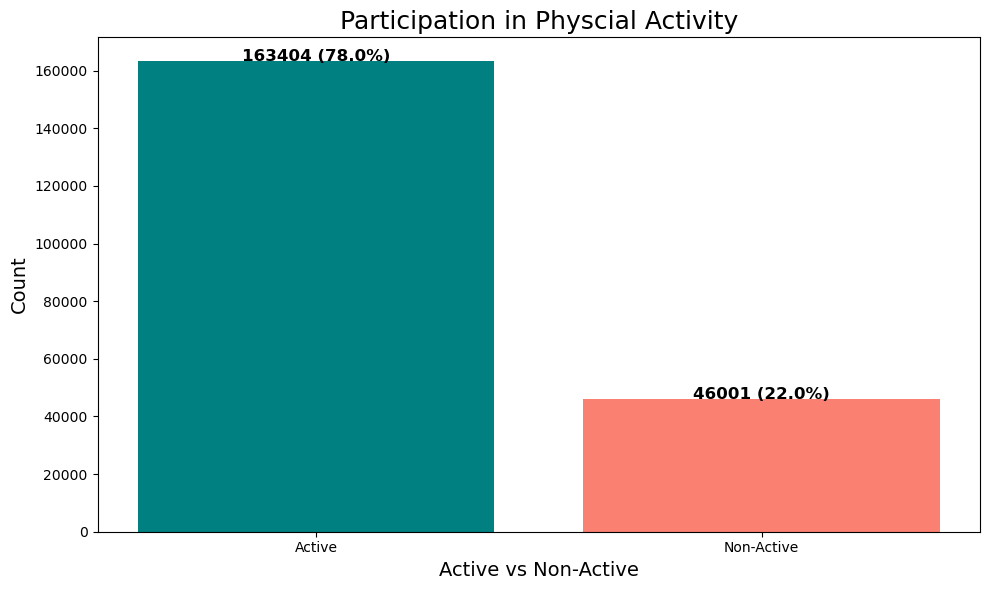

In [43]:
# Plotting visual for Physical Activity
outcome_counts_pa = df_clean_train['_TOTINDA'].value_counts()

# Calculate percentages
total = outcome_counts_pa.sum()
percentages = [count / total * 100 for count in outcome_counts_pa]

# Define colors and labels
colors = ['teal', 'salmon']
labels = ['Active', 'Non-Active']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_pa.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_pa, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Active vs Non-Active', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Participation in Physcial Activity', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()


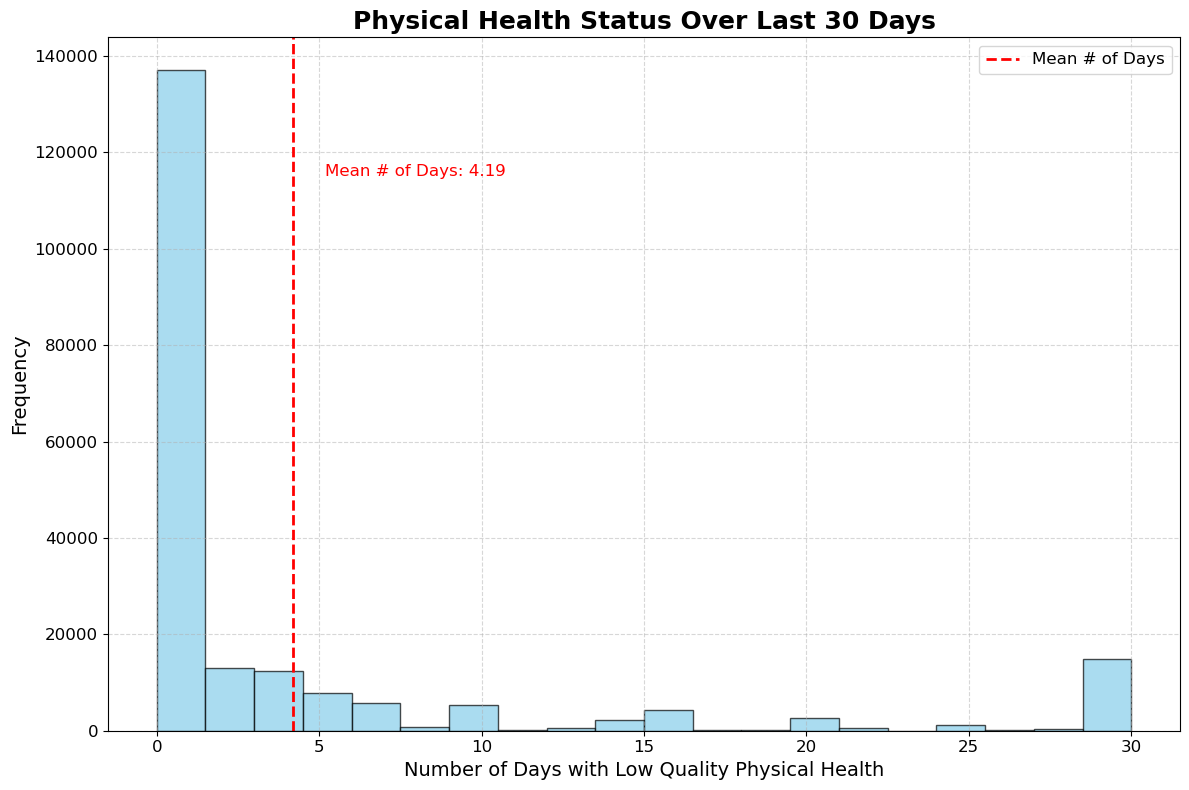

In [44]:
# Plotting Distributions for Physical Health Status

column_name = 'PHYSHLTH'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Physical Health Status Over Last 30 Days', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Number of Days with Low Quality Physical Health', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean # of Days')
plt.legend(fontsize=12)
plt.text(df_clean_train[column_name].mean() + 1, plt.gca().get_ylim()[1] * 0.8,
         f"Mean # of Days: {df_clean_train[column_name].mean():.2f}", fontsize=12, color='red')
plt.tight_layout()
plt.show()

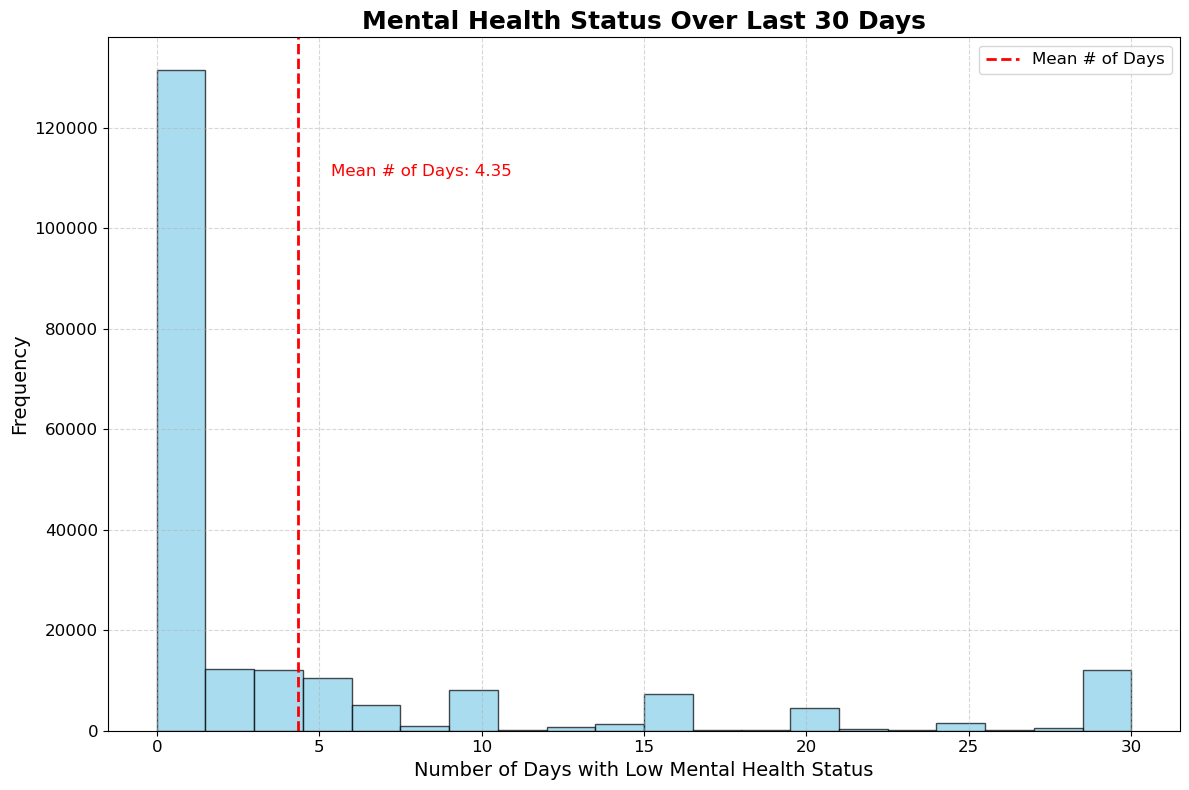

In [45]:
# Plotting Distributions for Mental Health Status

column_name = 'MENTHLTH'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Mental Health Status Over Last 30 Days', fontsize=18, fontweight='bold', color='black')
plt.xlabel('Number of Days with Low Mental Health Status', fontsize=14, color='black')
plt.ylabel('Frequency', fontsize=14, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean # of Days')
plt.legend(fontsize=12)
plt.text(df_clean_train[column_name].mean() + 1, plt.gca().get_ylim()[1] * 0.8,
         f"Mean # of Days: {df_clean_train[column_name].mean():.2f}", fontsize=12, color='red')
plt.tight_layout()
plt.show()

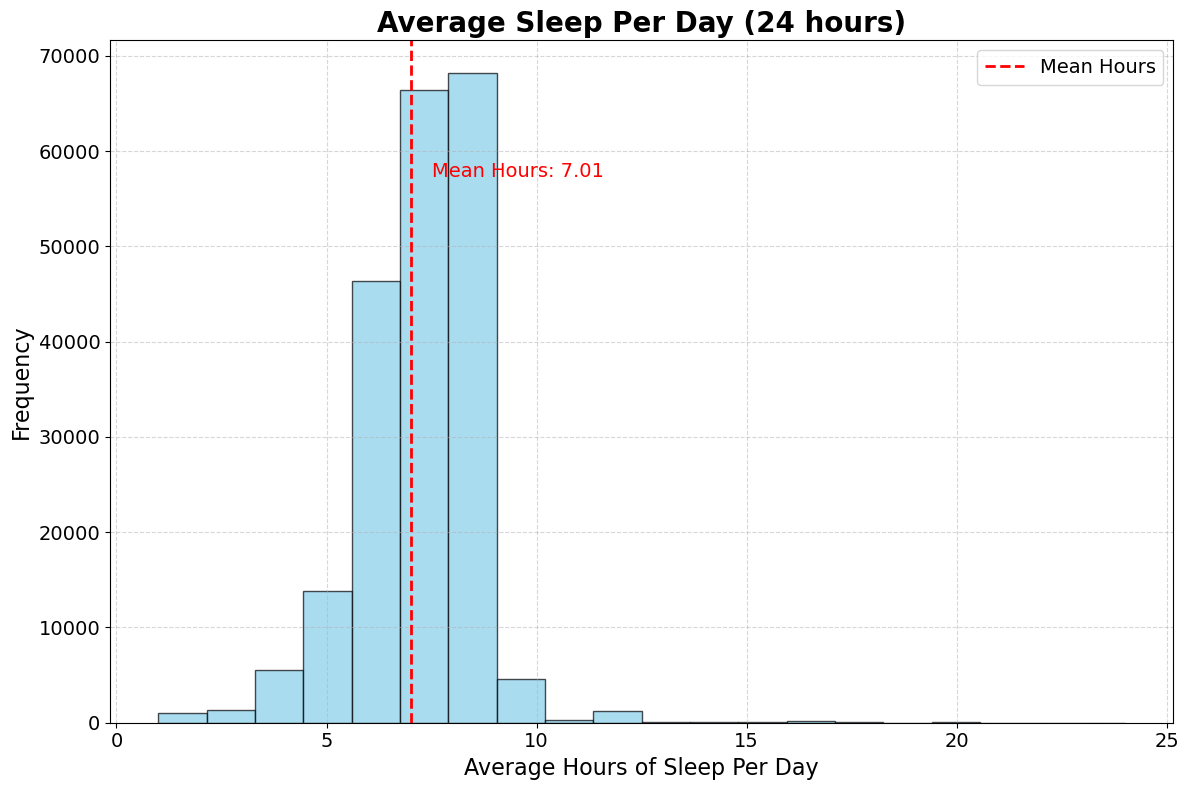

In [49]:
# Plotting Distribution for Average Sleep Time per day/ 24 hours
import matplotlib.pyplot as plt

column_name = 'SLEPTIM1'

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(df_clean_train[column_name], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Sleep Per Day (24 hours)', fontsize=20, fontweight='bold', color='black')
plt.xlabel('Average Hours of Sleep Per Day', fontsize=16, color='black')
plt.ylabel('Frequency', fontsize=16, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=14, color='black')
plt.yticks(fontsize=14, color='black')
plt.axvline(df_clean_train[column_name].mean(), color='red', linestyle='--', linewidth=2, label='Mean Hours')
plt.legend(fontsize=14)
plt.text(df_clean_train[column_name].mean() + 0.5, plt.gca().get_ylim()[1] * 0.8,
         f"Mean Hours: {df_clean_train[column_name].mean():.2f}", fontsize=14, color='red')
plt.tight_layout()
plt.show()

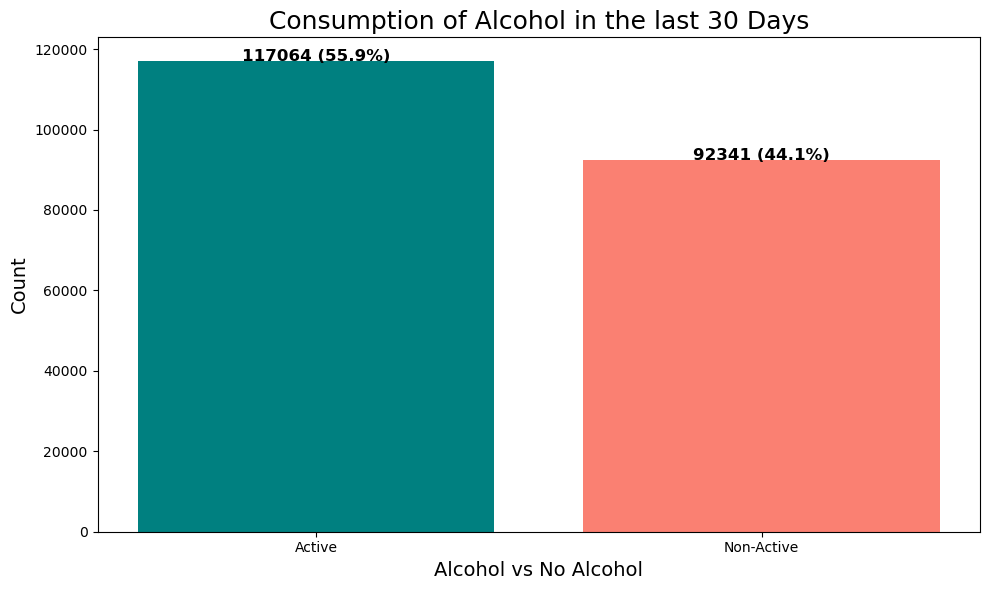

In [50]:
# Plotting visual for Alcohol use
outcome_counts_alc = df_clean_train['DRNKANY6'].value_counts()

# Calculate percentages
total = outcome_counts_alc.sum()
percentages = [count / total * 100 for count in outcome_counts_alc]

# Define colors and labels
colors = ['teal', 'salmon']
labels = ['Active', 'Non-Active']

# Create the plot
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, outcome_counts_alc.values, color=colors)

# Adding text on top of each bar
for i, (count, percent) in enumerate(zip(outcome_counts_alc, percentages)):
    plt.text(i, count + 50, f"{count} ({percent:.1f}%)", ha='center', fontsize=12, fontweight='bold')

# Adding labels and title
plt.xlabel('Alcohol vs No Alcohol', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Consumption of Alcohol in the last 30 Days', fontsize=18)

# Display the plot
plt.tight_layout()
plt.show()

Obese         1.000000
BMI           0.773590
Overweight    0.490270
GENHLTH       0.214126
EXERANY2      0.131652
_TOTINDA      0.131652
_RFHLTH       0.130028
_PHYS14D      0.101124
PHYSHLTH      0.096320
MENTHLTH      0.069611
_MENT14D      0.062456
DRNKANY6      0.060046
_METSTAT      0.032709
_URBSTAT      0.025287
_CHLDCNT      0.025253
_IMPRACE      0.019933
_AGE_G        0.011891
_RACE1        0.011484
_STATE        0.011300
_RACEPR1      0.010491
_SEX         -0.001524
_AGE80       -0.004591
VETERAN3     -0.004695
_CURECI2     -0.005743
MARITAL      -0.008025
EMPLOY1      -0.008944
_SMOKER3     -0.009327
_HLTHPLN     -0.010705
_HISPANC     -0.012478
_RFBING6     -0.015571
PERSDOC3     -0.029227
_MICHD       -0.040786
SLEPTIM1     -0.044867
CHECKUP1     -0.050236
_INCOMG1     -0.062646
_EDUCAG      -0.076865
ADDEPEV3     -0.090618
_DRDXAR2     -0.113408
DIABETE4     -0.153603
Name: Obese, dtype: float64


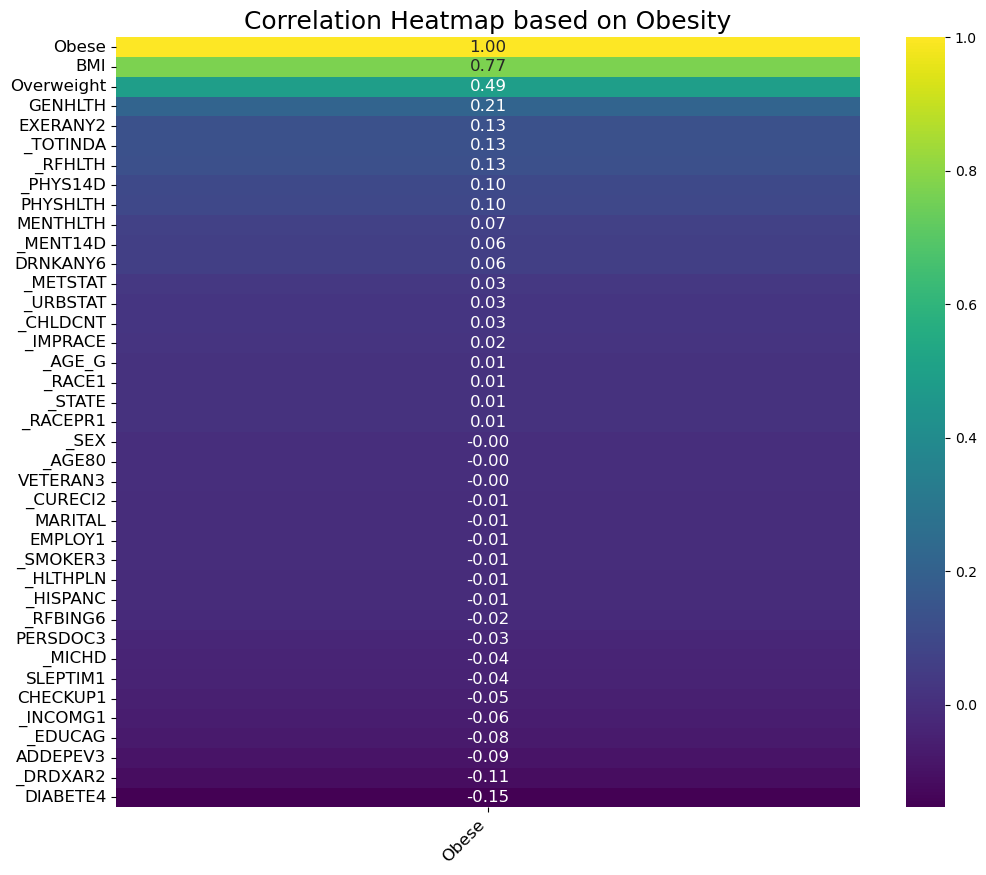

In [51]:
# Checking correlations between feature variables and  target variable Obesity 
print(df_clean_train.corr()["Obese"].sort_values(ascending=False))

# Heatmap showing correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean_train.corr()[['Obese']].sort_values(by='Obese', ascending=False)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap based on Obesity', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


BMI           1.000000
Obese         0.773590
Overweight    0.623309
GENHLTH       0.245605
_RFHLTH       0.159619
EXERANY2      0.158834
_TOTINDA      0.158834
_PHYS14D      0.119571
PHYSHLTH      0.115883
MENTHLTH      0.079886
DRNKANY6      0.073116
_MENT14D      0.069381
_CHLDCNT      0.034086
_METSTAT      0.032891
_IMPRACE      0.027786
_URBSTAT      0.027158
_RACE1        0.019392
_RACEPR1      0.018158
_STATE        0.015855
_AGE_G        0.010405
VETERAN3     -0.001351
_SMOKER3     -0.001752
_SEX         -0.005592
_HLTHPLN     -0.006202
_AGE80       -0.008882
MARITAL      -0.012904
EMPLOY1      -0.013847
_CURECI2     -0.015030
_RFBING6     -0.019847
_HISPANC     -0.022649
PERSDOC3     -0.032932
_MICHD       -0.046313
SLEPTIM1     -0.054014
CHECKUP1     -0.058308
_INCOMG1     -0.071618
_EDUCAG      -0.084097
ADDEPEV3     -0.104941
_DRDXAR2     -0.129310
DIABETE4     -0.176466
Name: BMI, dtype: float64


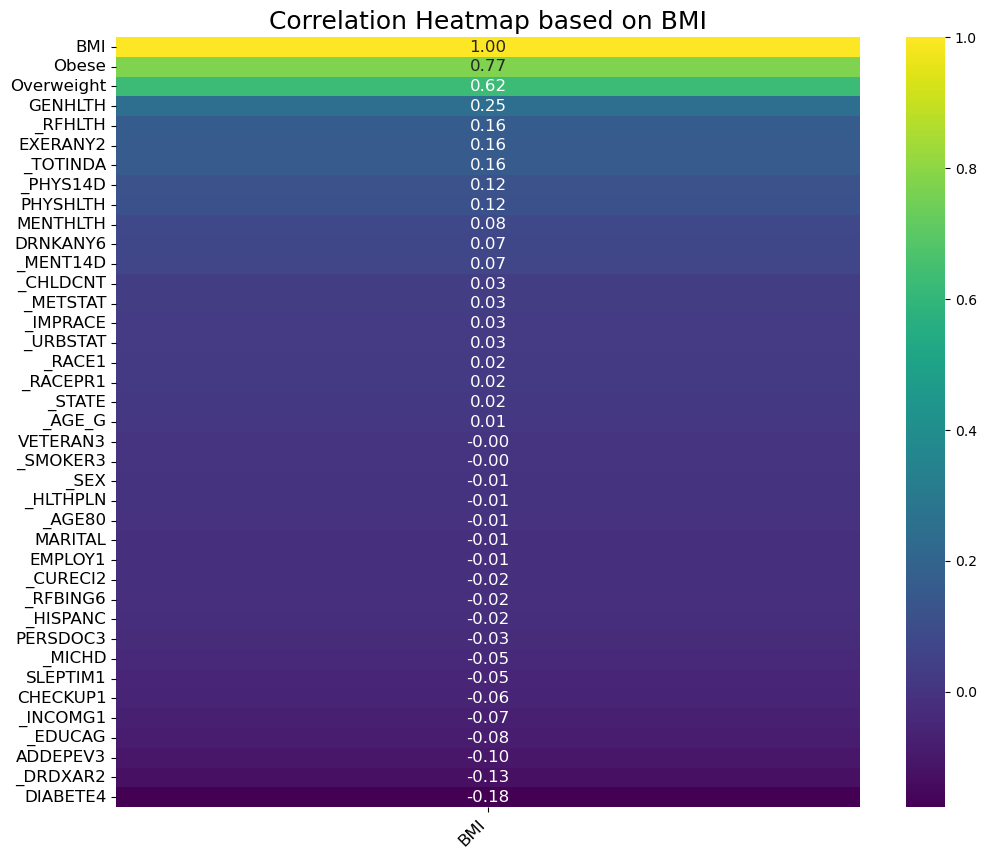

In [53]:
# Checking correlations between feature variables and BMI values 
print(df_clean_train.corr()["BMI"].sort_values(ascending=False))

# Heatmap showing correlations
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean_train.corr()[['BMI']].sort_values(by='BMI', ascending=False)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap based on BMI', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


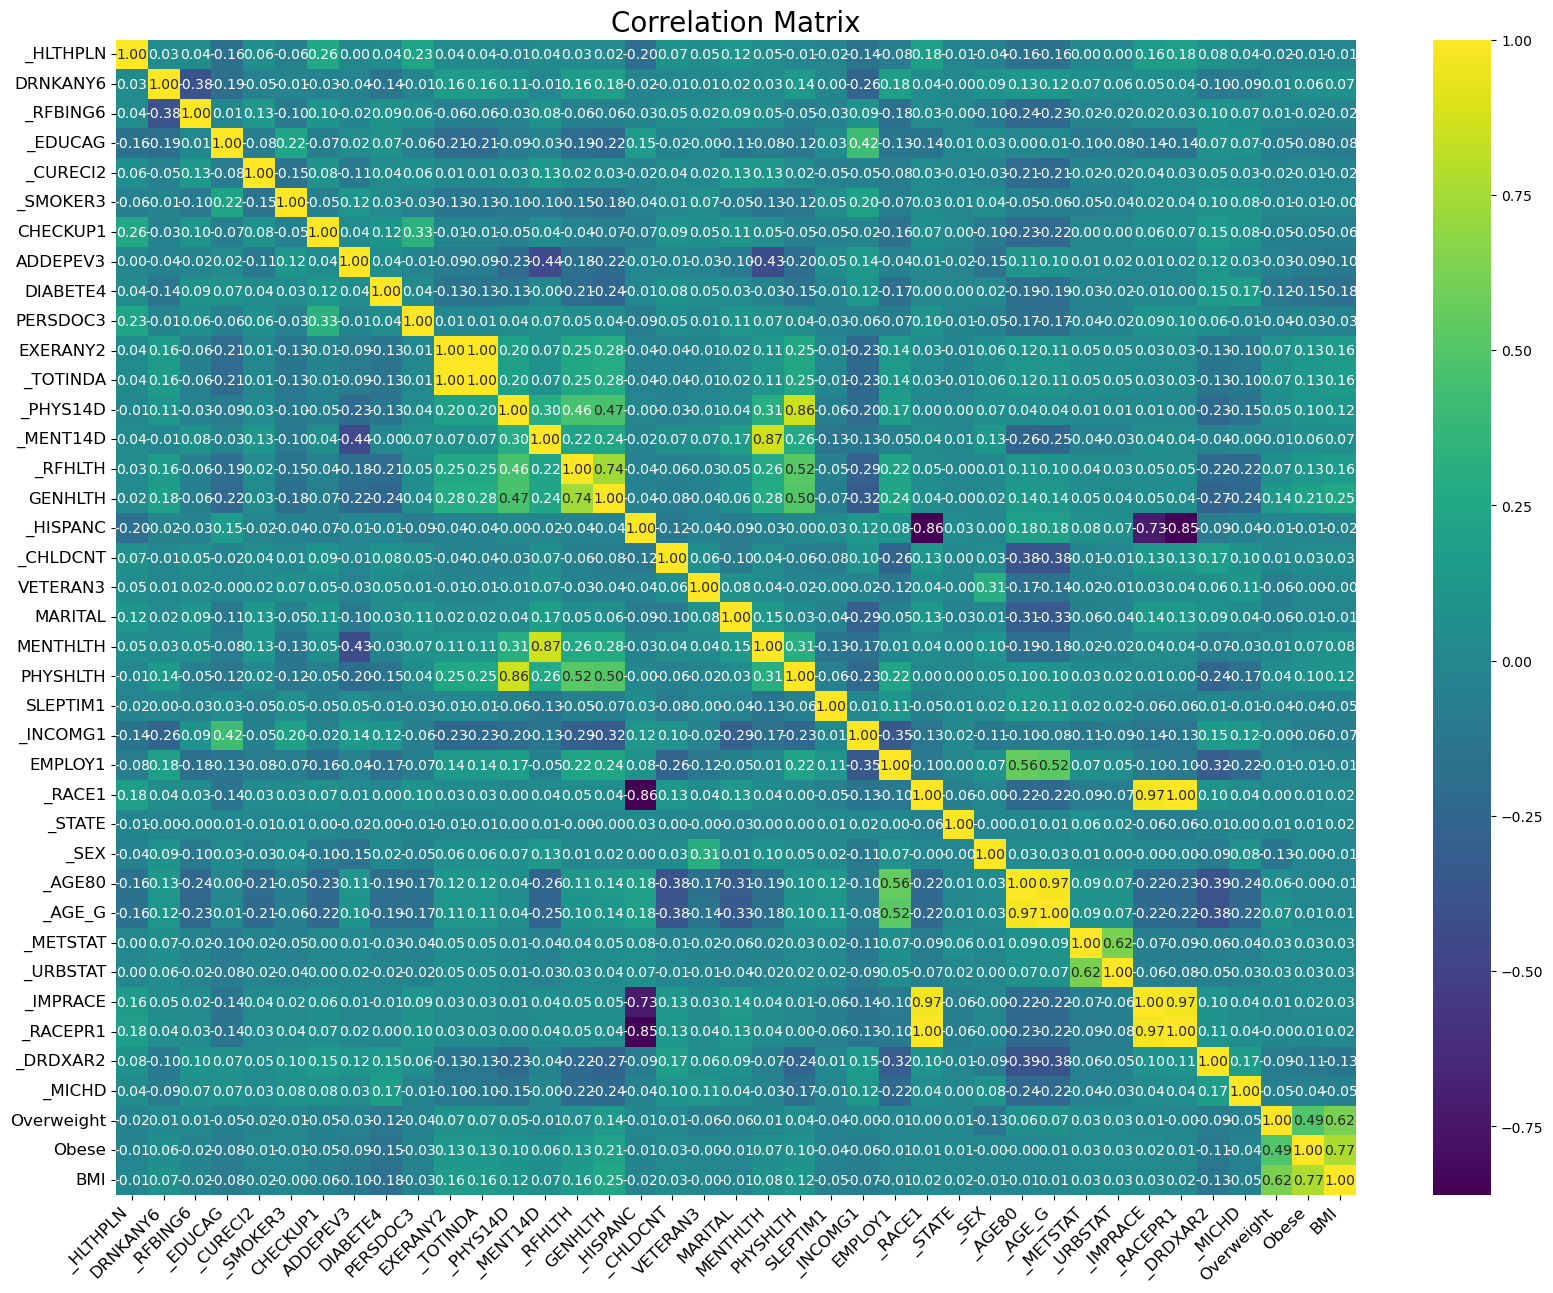

In [54]:
# Generating Correlation matrix
corr_matrix = df_clean_train.corr()

# Set up figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot heatmap
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", ax=ax)

# Set title and labels
ax.set_title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

Highly correlated feature pairs and their correlation values:
('EXERANY2', '_TOTINDA', 1.0)
('_PHYS14D', 'PHYSHLTH', 0.8596432014671983)
('_MENT14D', 'MENTHLTH', 0.8662285848792133)
('_RFHLTH', 'GENHLTH', 0.7378124404978128)
('_HISPANC', '_RACE1', -0.8599423450794051)
('_HISPANC', '_IMPRACE', -0.7270138810714158)
('_HISPANC', '_RACEPR1', -0.8498126014274968)
('_RACE1', '_IMPRACE', 0.9664860594633732)
('_RACE1', '_RACEPR1', 0.9986511692436323)
('_AGE80', '_AGE_G', 0.9732856932793934)
('_IMPRACE', '_RACEPR1', 0.9702337880930768)
('Obese', 'BMI', 0.7735898242851831)


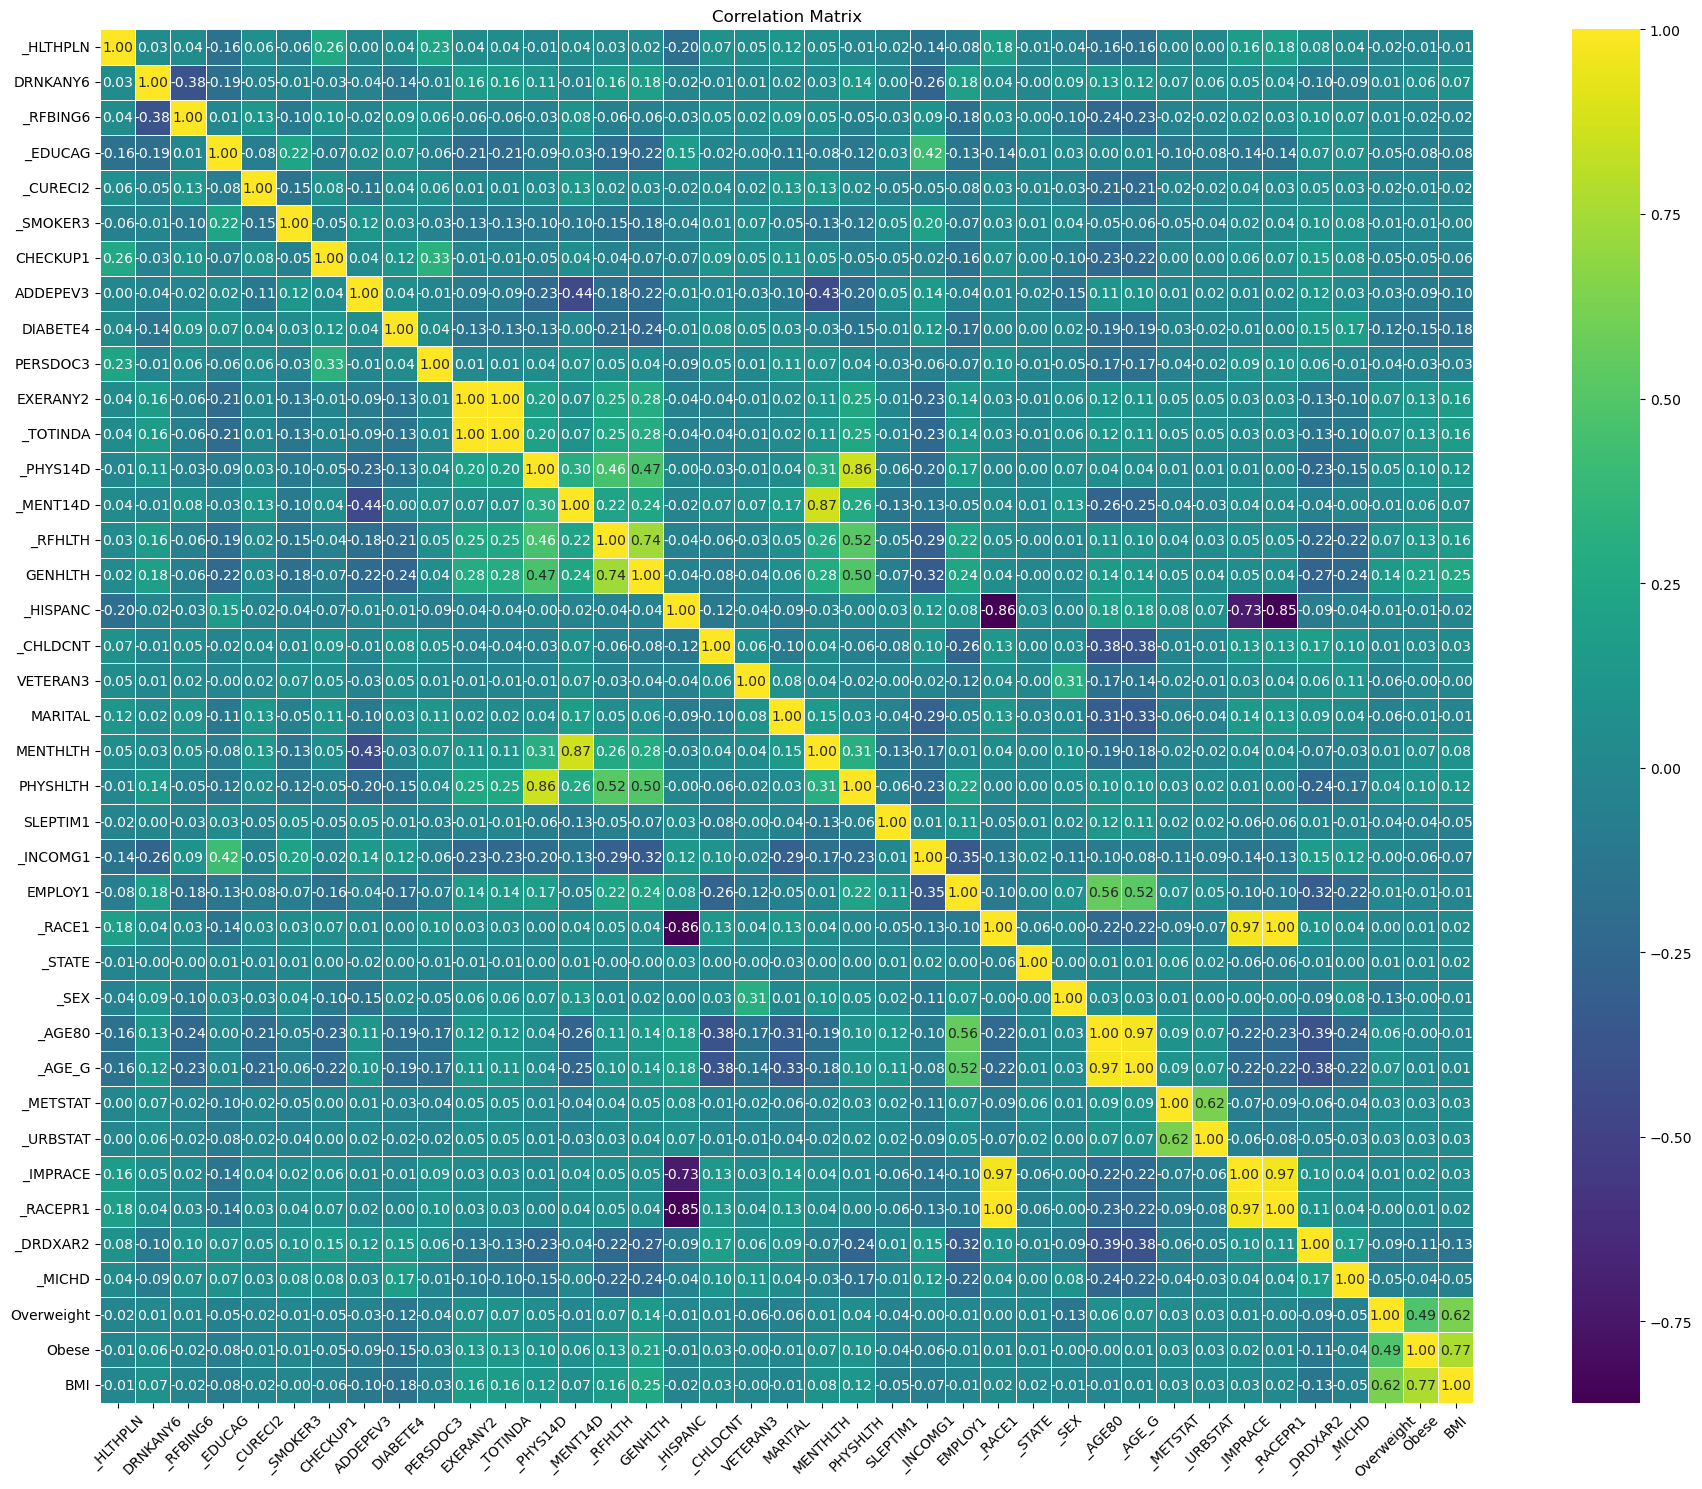

In [55]:
# Calculate correlation matrix
corr_matrix = df_clean_train.corr()

# Set the threshold for high correlation
threshold = 0.7  # You can adjust this threshold as needed

# Find pairs of highly correlated features
high_correlation_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print highly correlated feature pairs with correlation values
if len(high_correlation_pairs) > 0:
    print("Highly correlated feature pairs and their correlation values:")
    for pair in high_correlation_pairs:
        print(pair)
else:
    print("No highly correlated feature pairs found.")

# Plot heatmap of correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True, square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

There are multiple features with high multicolinearity. To start, I set the threshold to 0.7 and plan to drop features from the feature pairs that are over 0.7. While BMI and obesity are over 0.7, both of these will remain. Since Obesity is classified based on BMI values, the BMI column will be dropped prior to modeling. 

# Dropping features with higher multicolinearity
df_final = df_clean.drop(columns = [ '_MENT14D', '_PHYS14D', '_AGE80', '_RACE1', '_RACEPR1', 
                                    '_HISPANC', '_BMI5', '_RFHLTH', 'EXERANY2'])
df_final.info()
                                    

In [67]:
# Dropping features with higher multicolinearity
X_final_train = df_clean_train.drop(columns = [ '_MENT14D', '_PHYS14D', '_AGE80', '_RACE1', '_RACEPR1', 
                                    '_HISPANC', 'BMI', '_RFHLTH', 'EXERANY2'])

X_final_train.info()
                      

<class 'pandas.core.frame.DataFrame'>
Index: 209405 entries, 383796 to 36923
Data columns (total 30 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    209405 non-null  float64
 1   DRNKANY6    209405 non-null  float64
 2   _RFBING6    209405 non-null  float64
 3   _EDUCAG     209405 non-null  float64
 4   _CURECI2    209405 non-null  float64
 5   _SMOKER3    209405 non-null  float64
 6   CHECKUP1    209405 non-null  float64
 7   ADDEPEV3    209405 non-null  float64
 8   DIABETE4    209405 non-null  float64
 9   PERSDOC3    209405 non-null  float64
 10  _TOTINDA    209405 non-null  float64
 11  GENHLTH     209405 non-null  float64
 12  _CHLDCNT    209405 non-null  float64
 13  VETERAN3    209405 non-null  float64
 14  MARITAL     209405 non-null  float64
 15  MENTHLTH    209405 non-null  float64
 16  PHYSHLTH    209405 non-null  float64
 17  SLEPTIM1    209405 non-null  float64
 18  _INCOMG1    209405 non-null  float64
 19  EMP

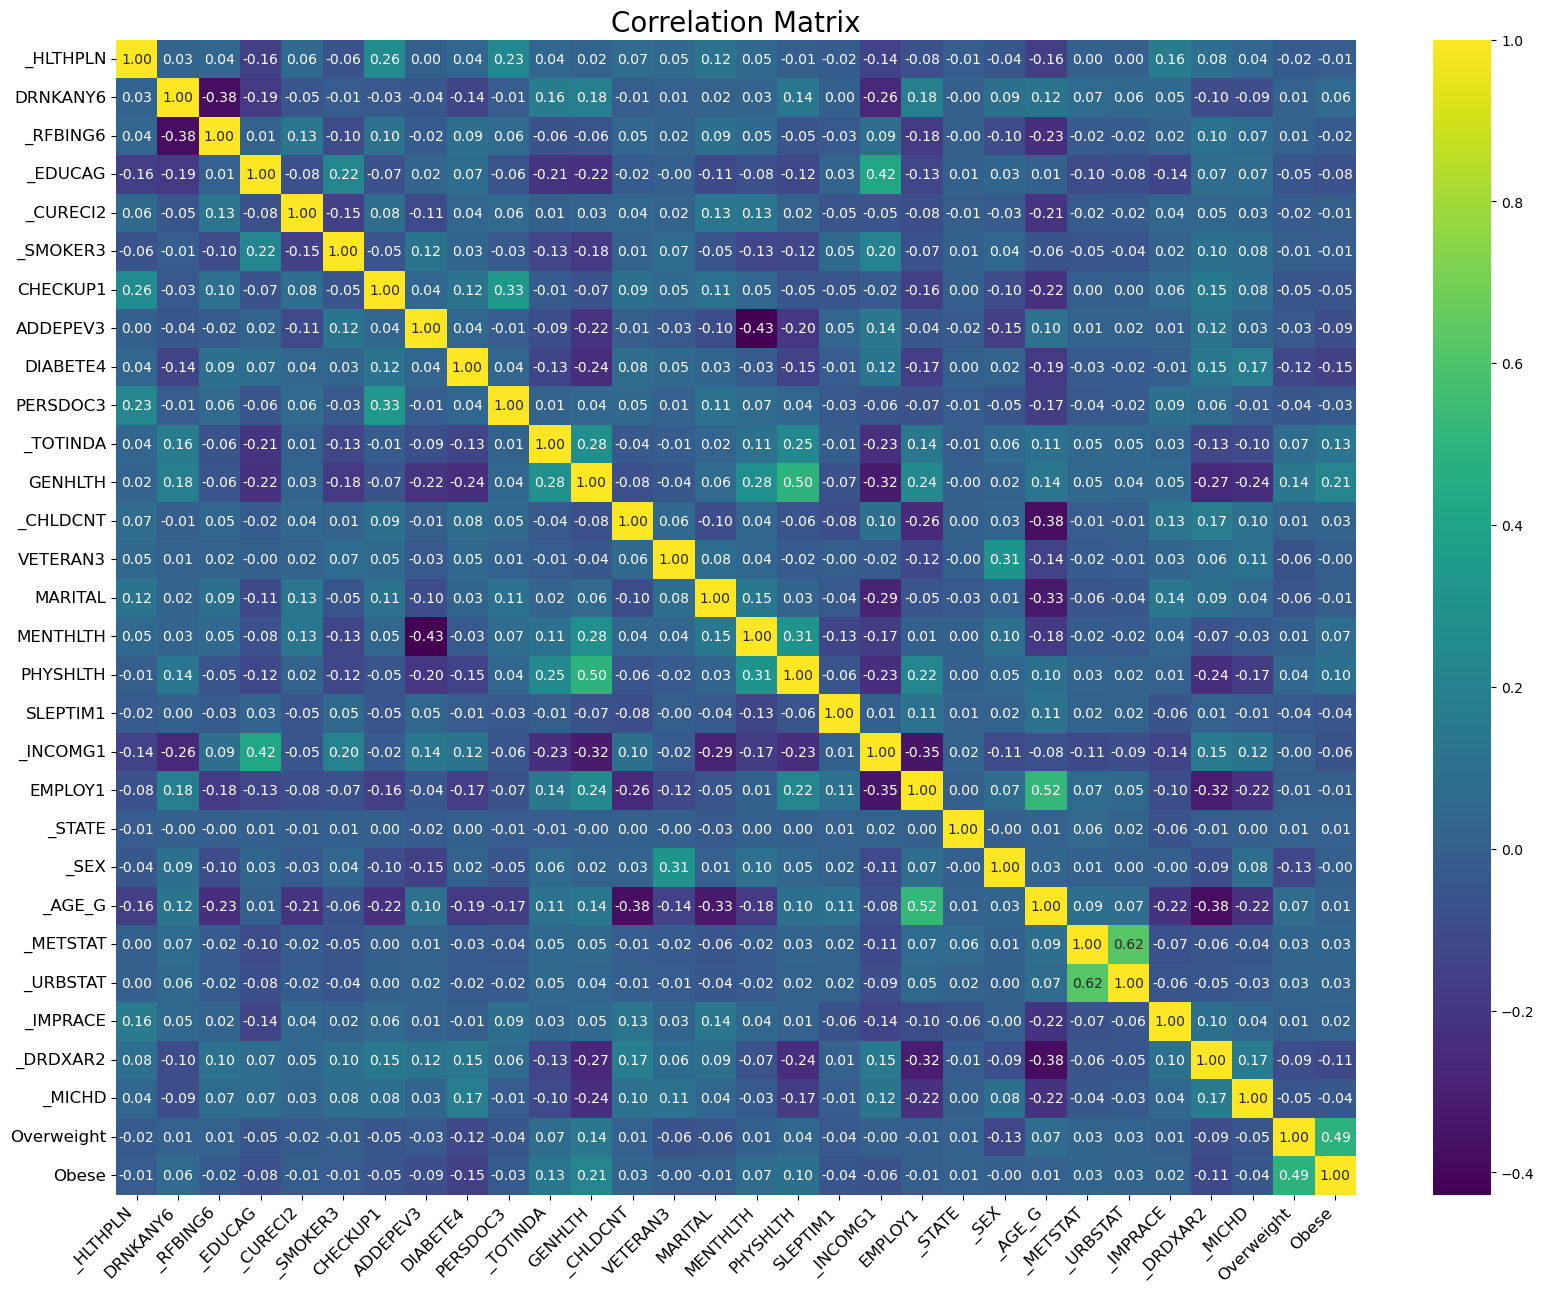

In [59]:
# Generating Correlation matrix for final training set
corr_matrix = X_final_train.corr()

# Set up figure and axis
fig, ax = plt.subplots(figsize=(20, 15))

# Plot heatmap
sns.heatmap(corr_matrix, cmap='viridis', annot=True, fmt=".2f", ax=ax)

# Set title and labels
ax.set_title('Correlation Matrix', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

Obese         1.000000
Overweight    0.490270
GENHLTH       0.214126
_TOTINDA      0.131652
PHYSHLTH      0.096320
MENTHLTH      0.069611
DRNKANY6      0.060046
_METSTAT      0.032709
_URBSTAT      0.025287
_CHLDCNT      0.025253
_IMPRACE      0.019933
_AGE_G        0.011891
_STATE        0.011300
_SEX         -0.001524
VETERAN3     -0.004695
_CURECI2     -0.005743
MARITAL      -0.008025
EMPLOY1      -0.008944
_SMOKER3     -0.009327
_HLTHPLN     -0.010705
_RFBING6     -0.015571
PERSDOC3     -0.029227
_MICHD       -0.040786
SLEPTIM1     -0.044867
CHECKUP1     -0.050236
_INCOMG1     -0.062646
_EDUCAG      -0.076865
ADDEPEV3     -0.090618
_DRDXAR2     -0.113408
DIABETE4     -0.153603
Name: Obese, dtype: float64


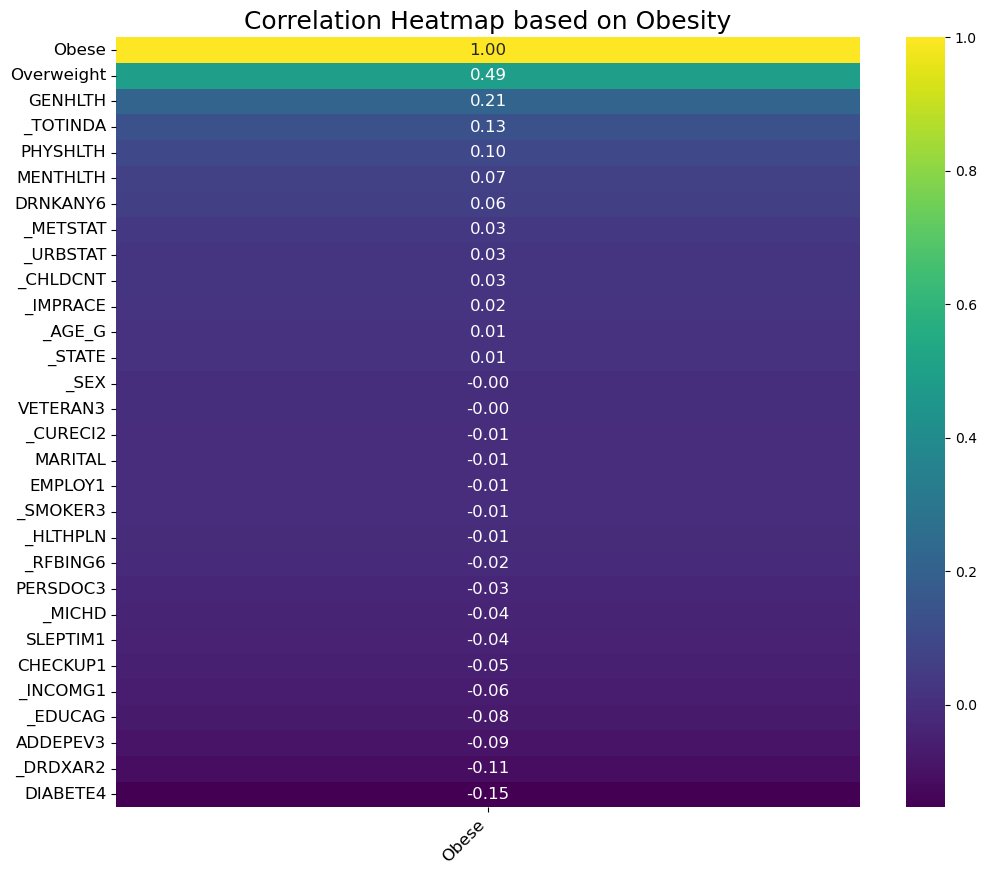

In [60]:
# Checking correlations between feature variables and  target variable Obesity with reduced final df
print(X_final_train.corr()["Obese"].sort_values(ascending=False))

# Heatmap showing correlations
plt.figure(figsize=(12, 10))
correlation_matrix = X_final_train.corr()[['Obese']].sort_values(by='Obese', ascending=False)
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap based on Obesity', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


## Preprocessing Test Data

Training data has been cleaned and preprocessed. Test set will be preprocessed to prepare for modeling.

# checking for null and dropping duplicates
X_test.isna().sum())
X_test.drop_duplicates(inplace=True)

# Imputing missing values for numerical variables with median
numerical_cols = ['_BMI5']
for col in numerical_cols:
    median_val = X_train[col].median()
    X_test[col].fillna(median_val, inplace=True)

print(X_train.info())
print(X_train.isna().sum())

In [73]:
# Concatenating x and y train for processesing
df_test = pd.concat([X_test, y_test], axis=1)
X_test = df_test.copy()

In [102]:
# remmove cell before final draft
#X_test = df_test.copy()

In [103]:
# checking for null and dropping duplicates
X_test.drop_duplicates(inplace=True)
print(X_test.isna().sum())
print(X_test.info())

_STATE            2
_SEX              2
_AGE80            2
_AGE_G            2
MARITAL           4
_EDUCAG           2
_INCOMG1          2
VETERAN3       1010
EMPLOY1        1492
_CHLDCNT          3
_METSTAT       2384
_URBSTAT       2384
_IMPRACE          2
_RACE1            2
_RACEPR1          2
_HISPANC          2
_BMI5         12263
GENHLTH           4
_RFHLTH           2
PHYSHLTH          3
_PHYS14D          2
MENTHLTH          4
_MENT14D          2
EXERANY2          3
_TOTINDA          2
SLEPTIM1          4
_HLTHPLN          2
PERSDOC3          3
CHECKUP1          3
ADDEPEV3          6
_DRDXAR2        654
_MICHD         1248
DIABETE4          3
_SMOKER3          2
_CURECI2          2
DRNKANY6          2
_RFBING6          2
Overweight        2
Obese             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 111283 entries, 299404 to 142261
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _STATE 

In [104]:
# Imputing missing values for numerical variable of _BMI
# Using train sets median to avoid computation of test set to maintain consistency and avoid data leakage
# Imputing missing values for numerical variables with median

train_median_bmi
numerical_cols = ['_BMI5']
for col in numerical_cols:
    median_val = train_median_bmi
    X_test[col].fillna(median_val, inplace=True)

# Dropping rest of Na Values as they are a very low percentage 
X_test = X_test.dropna().copy()

# Verify if there are any missing values remaining
missing_values = X_test.isnull().sum()
print("Remaining missing values:\n", missing_values[missing_values > 0])

print(X_test.isna().sum())

Remaining missing values:
 Series([], dtype: int64)
_STATE        0
_SEX          0
_AGE80        0
_AGE_G        0
MARITAL       0
_EDUCAG       0
_INCOMG1      0
VETERAN3      0
EMPLOY1       0
_CHLDCNT      0
_METSTAT      0
_URBSTAT      0
_IMPRACE      0
_RACE1        0
_RACEPR1      0
_HISPANC      0
_BMI5         0
GENHLTH       0
_RFHLTH       0
PHYSHLTH      0
_PHYS14D      0
MENTHLTH      0
_MENT14D      0
EXERANY2      0
_TOTINDA      0
SLEPTIM1      0
_HLTHPLN      0
PERSDOC3      0
CHECKUP1      0
ADDEPEV3      0
_DRDXAR2      0
_MICHD        0
DIABETE4      0
_SMOKER3      0
_CURECI2      0
DRNKANY6      0
_RFBING6      0
Overweight    0
Obese         0
dtype: int64


In [105]:
# Creating function to remove missing value placeholders
def remove_place_holders(X_test):

    X_test1 = X_test[['_HLTHPLN', 'DRNKANY6', '_RFBING6', '_EDUCAG',
                   '_CURECI2', '_SMOKER3', 'CHECKUP1', 'ADDEPEV3',
                   'DIABETE4', 'PERSDOC3', 'EXERANY2', '_TOTINDA', 
                    '_PHYS14D', '_MENT14D', '_RFHLTH', 'GENHLTH', 
                    '_HISPANC', '_CHLDCNT', 'VETERAN3', 'MARITAL']]


    X_test2 = X_test[['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1']]



    X_test3 = X_test[['_INCOMG1', 'EMPLOY1', '_RACE1']]



    X_test4 = X_test.drop(columns = ['_INCOMG1', 'EMPLOY1', '_RACE1', 'MENTHLTH', 
                                   'PHYSHLTH', 'SLEPTIM1', '_HLTHPLN', 'DRNKANY6', 
                                   '_RFBING6', '_EDUCAG', '_CURECI2', '_SMOKER3', 
                                   'CHECKUP1', 'ADDEPEV3', 'DIABETE4', 'PERSDOC3', 
                                   'EXERANY2', '_TOTINDA', '_PHYS14D', '_MENT14D', 
                                   '_RFHLTH', 'GENHLTH', '_HISPANC', '_CHLDCNT', 
                                   'VETERAN3','MARITAL'], axis = 1)

    # Looping through columns to remove placeholder values 
    for col in X_test1.columns:
        X_test1 = X_test1[X_test1[col] != 7777.0]
        X_test1 = X_test1[X_test1[col] != 9999.0]
        X_test1 = X_test1[X_test1[col] != 77.0]
        X_test1 = X_test1[X_test1[col] != 99.0]
        X_test1 = X_test1[X_test1[col] != 9.0]
        X_test1 = X_test1[X_test1[col] != 7.0]
        X_test1 = X_test1[X_test1[col] != 9900.0]
    

    for col in X_test2.columns:
        X_test2 = X_test2[X_test2[col] != 77.0]
        X_test2 = X_test2[X_test2[col] != 99.0]


    for col in X_train3.columns:
        X_test3 = X_test3[X_test3[col] != 9.0]
 


    X_test_no_na = pd.concat([X_test1, X_test2, X_test3, X_test4], axis=1)
    X_test = X_test_no_na.copy()


    return X_test

In [106]:
# Removing placeholders with function
X_test = remove_place_holders(X_test)
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 105702 entries, 299404 to 237773
Data columns (total 39 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   _HLTHPLN    83826 non-null   float64
 1   DRNKANY6    83826 non-null   float64
 2   _RFBING6    83826 non-null   float64
 3   _EDUCAG     83826 non-null   float64
 4   _CURECI2    83826 non-null   float64
 5   _SMOKER3    83826 non-null   float64
 6   CHECKUP1    83826 non-null   float64
 7   ADDEPEV3    83826 non-null   float64
 8   DIABETE4    83826 non-null   float64
 9   PERSDOC3    83826 non-null   float64
 10  EXERANY2    83826 non-null   float64
 11  _TOTINDA    83826 non-null   float64
 12  _PHYS14D    83826 non-null   float64
 13  _MENT14D    83826 non-null   float64
 14  _RFHLTH     83826 non-null   float64
 15  GENHLTH     83826 non-null   float64
 16  _HISPANC    83826 non-null   float64
 17  _CHLDCNT    83826 non-null   float64
 18  VETERAN3    83826 non-null   float64
 19  MA

In [107]:
# Drop rows with NaNs in the specified columns
X_test.dropna(inplace=True)

# Creating Adjusted BMI column rounded to two decimal places
X_test['BMI'] = round(X_test['_BMI5'] * 0.01, 2)
# 88 is labeled a 0 days planning to replace all rows with values of 88 to 0
# Replacing placeholder values with NaN
placeholders = [88.0]
for col in X_test[['MENTHLTH', 'PHYSHLTH']]:
    X_test[col].replace(placeholders, 0 , inplace=True)

X_test = X_test.drop(columns = ['_BMI5'])

# Creating final clean train dataset
X_test_clean = X_test.copy()

# Dropping highly correlated columns
X_final_test = X_test_clean.drop(columns = [ '_MENT14D', '_PHYS14D', '_AGE80', '_RACE1', '_RACEPR1', 
                                    '_HISPANC', 'BMI', '_RFHLTH', 'EXERANY2'])
X_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69638 entries, 299404 to 132307
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _HLTHPLN    69638 non-null  float64
 1   DRNKANY6    69638 non-null  float64
 2   _RFBING6    69638 non-null  float64
 3   _EDUCAG     69638 non-null  float64
 4   _CURECI2    69638 non-null  float64
 5   _SMOKER3    69638 non-null  float64
 6   CHECKUP1    69638 non-null  float64
 7   ADDEPEV3    69638 non-null  float64
 8   DIABETE4    69638 non-null  float64
 9   PERSDOC3    69638 non-null  float64
 10  _TOTINDA    69638 non-null  float64
 11  GENHLTH     69638 non-null  float64
 12  _CHLDCNT    69638 non-null  float64
 13  VETERAN3    69638 non-null  float64
 14  MARITAL     69638 non-null  float64
 15  MENTHLTH    69638 non-null  float64
 16  PHYSHLTH    69638 non-null  float64
 17  SLEPTIM1    69638 non-null  float64
 18  _INCOMG1    69638 non-null  float64
 19  EMPLOY1     69638 non-nu

# Modeling early split dataset

In [109]:
# Separate features and target variable
# Leaving overweight variable in, may adjust and remove depending in performance
X_train = X_final_train.drop(['Obese'], axis=1)
y_train = X_final_train['Obese']

X_test = X_final_test.drop(['Obese'], axis=1)
y_test = X_final_test['Obese']


In [110]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

## Baseline Logistic Model 

In [111]:

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state = 42)
X_train_resample,y_train_resample = sm.fit_resample(X_train, y_train)

# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

_HLTHPLN  DRNKANY6  _RFBING6   _EDUCAG  _CURECI2  _SMOKER3  CHECKUP1  \
0 -0.219963 -0.928878 -0.434275  0.973858 -0.237462  0.683031 -0.407375   
1 -0.219963 -0.928878 -0.434275  0.973858 -0.237462  0.683031  0.765699   
2 -0.219963 -0.928878 -0.434275  0.973858 -0.237462  0.683031 -0.407375   
3 -0.219963 -0.928878 -0.434275  0.973858 -0.237462  0.683031  0.765699   
4 -0.219963 -0.928878 -0.434275 -1.268437  4.490053 -2.740497  3.111847   

   ADDEPEV3  DIABETE4  PERSDOC3  _TOTINDA   GENHLTH  _CHLDCNT  VETERAN3  \
0  0.558243  0.397264  0.700192 -0.572493  1.402484 -0.520118  0.388122   
1  0.558243  0.397264 -0.801026 -0.572493 -0.591730 -0.520118  0.388122   
2  0.558243  0.397264 -0.801026 -0.572493  0.405377  1.546133  0.388122   
3  0.558243  0.397264 -0.801026 -0.572493 -0.591730  2.579259  0.388122   
4  0.558243  0.397264  2.201409 -0.572493  0.405377  3.612385  0.388122   

    MARITAL  MENTHLTH  PHYSHLTH  SLEPTIM1  _INCOMG1   EMPLOY1    _STATE  \
0 -0.753342 -0.183215 -0.511657  0.006944  0.310729 -0.907370  1.324444   
1 -0.753342 -0.540345 -0.511657  0.721421  0.953912  1.191529  1.452368   
2 -0.753342 -0.540345 -0.511657 -1.422011  1.597095 -0.907370  0.556900   
3 -0.753342  0.650088 -0.511657  0.006944  1.597095 -0.907370  1.452368   
4  1.647818  3.030954 -0.282453 -1.422011 -1.618818 -0.907370  1.580292   

       _SEX    _AGE_G  _METSTAT  _URBSTAT  _IMPRACE  _DRDXAR2    _MICHD  \
0  0.980838 -0.256380 -0.634592  -0.39516  0.282970 -1.360560  0.326473   
1  0.980838  1.048702 -0.634592  -0.39516 -0.458070 -1.360560  0.326473   
2 -1.078014 -0.256380 -0.634592  -0.39516  3.247133  0.774325  0.326473   
3 -1.078014 -0.908921 -0.634592  -0.39516 -0.458070  0.774325  0.326473   
4 -1.078014 -0.908921 -0.634592  -0.39516 -0.458070 -1.360560  0.326473   

   Overweight  
0    0.566851  
1   -1.764132  
2    0.566851  
3   -1.764132  
4    0.566851

In [112]:
#Instantiate the model 
baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

# Baseline test score 
baseline_score = baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
baseline_train_score = baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
baseline_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)


print("Baseline Training Score:", baseline_train_score)
print("Baseline Test Score:", baseline_score)
print("Cross Validation Scores:", baseline_cv)


# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)


Baseline Training Score: 0.7583573001312496
Baseline Test Score: 0.7007237427841121
Cross Validation Scores: [0.75281503 0.75152406 0.75632934 0.76118413 0.76693981]
              precision    recall  f1-score   support

           0       0.94      0.59      0.72     46402
           1       0.53      0.92      0.67     23236

    accuracy                           0.70     69638
   macro avg       0.73      0.76      0.70     69638
weighted avg       0.80      0.70      0.71     69638



In [113]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))
    
# Generating baseline model scores 
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.7583573001312496
Model's Test Score: 0.7007237427841121
Cross Validation Scores: [0.75281503 0.75152406 0.75632934 0.76118413 0.76693981]
Model's Accuracy Score: 0.7007237427841121
Model's Precision Score: 0.5297139028808218
Model's F1 Score: 0.6719864016242504
Model's Recall Score: 0.9187467722499569


## Decision Tree Classifier simple model

In [114]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier 
dt_classifier.fit(X_train_scaled, y_train_resample)

# Make predictions for test data
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)

# Cross validating model
dt_cv = cross_val_score(dt_classifier, X_train_scaled, y_train_resample)


print("Decision Tree Training Score:", dt_train_score)
print("Decision Tree  Test Score:", dt_test_score)
print("Cross Validation Scores:", dt_cv)


# Classification report 
dt_report = classification_report(y_test, y_tree_pred)
print(dt_report)

# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Decision Tree Training Score: 0.9997740785632832
Decision Tree  Test Score: 0.69403199402625
Cross Validation Scores: [0.64815678 0.6486409  0.76628057 0.86935863 0.87052411]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     46402
           1       0.54      0.54      0.54     23236

    accuracy                           0.69     69638
   macro avg       0.66      0.66      0.66     69638
weighted avg       0.69      0.69      0.69     69638

Model's Train Score: 0.9997740785632832
Model's Test Score: 0.69403199402625
Cross Validation Scores: [0.64815678 0.6486409  0.76628057 0.86935863 0.87052411]
Model's Accuracy Score: 0.69403199402625
Model's Precision Score: 0.5417153237316725
Model's F1 Score: 0.540371464935177
Model's Recall Score: 0.5390342571871234


# Stopped Here for the night/ Ran baseline logreg and DT

In [85]:


# Separate features and target variable
# Also dropping overweight variable for modeling 
#X_train = df_final_train.drop(['Obese', 'Overweight'], axis=1)
#y_train = df_final_train['Obese']

# Define categorical and numerical columns
categorical_columns = ['_STATE', '_SEX', '_AGE_G', 'MARITAL', '_EDUCAG',
                       'EMPLOY1', '_INCOMG1', 'VETERAN3', '_CHLDCNT', 
                       '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                       '_TOTINDA', '_HLTHPLN', 'PERSDOC3', 'CHECKUP1',
                       'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', 
                       '_SMOKER3', '_CURECI2', 'DRNKANY6', '_RFBING6']

numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Combine the encoded categorical features with the numerical features
X_train_encoded = np.concatenate([X_train_encoded, X_train.drop(categorical_columns, axis=1)], axis=1)
X_test_encoded = np.concatenate([X_test_encoded, X_test.drop(categorical_columns, axis=1)], axis=1)

# Split the encoded data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    #('sampling', SMOTE()),  # Oversampling with SMOTE
    #('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline_logreg.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test_encoded)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62510
           1       1.00      1.00      1.00     26515

    accuracy                           1.00     89025
   macro avg       1.00      1.00      1.00     89025
weighted avg       1.00      1.00      1.00     89025



In [89]:
# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     62510
           1       1.00      1.00      1.00     26515

    accuracy                           1.00     89025
   macro avg       1.00      1.00      1.00     89025
weighted avg       1.00      1.00      1.00     89025



# Stopped here for the night. Need to restart from beginning and hold out a test set for modeling

In [101]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
# Also dropping overweight variable for modeling 
X = df_final.drop(['Obese', 'Overweight'], axis=1)
y = df_final[['Obese']]

# Define categorical and numerical columns
categorical_columns = ['_STATE', '_SEX', '_AGE_G', 'MARITAL', '_EDUCAG',
                       'EMPLOY1', '_INCOMG1', 'VETERAN3', '_CHLDCNT', 
                       '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                       '_TOTINDA', '_HLTHPLN', 'PERSDOC3', 'CHECKUP1',
                       'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', 
                       '_SMOKER3', '_CURECI2', 'DRNKANY6', '_RFBING6']
numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']

# Define preprocessing steps
# For logistic regression and neural networks: One-hot encode categorical variables and scale numerical variables
# For decision trees and random forests: One-hot encode or label encode categorical variables
logreg_nn_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

tree_rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define pipelines for logistic regression, decision trees, random forests, and neural networks
logreg_pipeline = Pipeline(steps=[('preprocessor', logreg_nn_preprocessor)])

tree_pipeline = Pipeline(steps=[('preprocessor', tree_rf_preprocessor)])

rf_pipeline = Pipeline(steps=[('preprocessor', tree_rf_preprocessor)])

nn_pipeline = Pipeline(steps=[('preprocessor', logreg_nn_preprocessor)])

# Fit and transform data using pipelines
X_logreg = logreg_pipeline.fit_transform(X)
X_tree = tree_pipeline.fit_transform(X)
X_rf = rf_pipeline.fit_transform(X)
X_nn = nn_pipeline.fit_transform(X)



# Modeling 

I plan to start with a basic Logistic Regression Model to establish a baseline model. From there based on performance parameter tuning will be implemented as needed and additional modeling utilizing Decision Tree Classifiers and Random Forest Models will be experimented with for comparison. Then I plan to utilize simple Nerual Network models to compare and adjust to find the overall best performing model. Metrics of evaluation will be both the Accuracy of the model and its overall F1- Score. 

In [109]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
# Also dropping overweight variable for modeling 
X = df_final.drop(['Obese', 'Overweight'], axis=1)
y = df_final['Obese']

# Define categorical and numerical columns
categorical_columns = ['_STATE', '_SEX', '_AGE_G', 'MARITAL', '_EDUCAG',
                       'EMPLOY1', '_INCOMG1', 'VETERAN3', '_CHLDCNT', 
                       '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                       '_TOTINDA', '_HLTHPLN', 'PERSDOC3', 'CHECKUP1',
                       'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', 
                       '_SMOKER3', '_CURECI2', 'DRNKANY6', '_RFBING6']

numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']

# Perform one-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Combine the encoded categorical features with the numerical features
X_encoded = np.concatenate([X_encoded, X.drop(categorical_columns, axis=1)], axis=1)

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    #('sampling', SMOTE()),  # Oversampling with SMOTE
    #('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline_logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       1.00      1.00      1.00     33249

    accuracy                           1.00    111279
   macro avg       1.00      1.00      1.00    111279
weighted avg       1.00      1.00      1.00    111279



In [115]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [116]:
# Generating baseline model scores 
model_scores(pipeline_logreg, X_train, X_test, y_train, y_test)

Model's Train Score: 0.9991253190189194
Model's Test Score: 0.9990025072116032
Cross Validation Scores: [0.99862209 0.99841239 0.99865203 0.99836746 0.99845732]
Model's Accuracy Score: 0.9990025072116032
Model's Precision Score: 0.9982558489204306
Model's F1 Score: 0.9983309023653069
Model's Recall Score: 0.9984059670967548


In [119]:
# Regular pipeline with OHE before 

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df_final.drop(['Obese', 'Overweight'], axis=1)
y = df_final['Obese']

# Define categorical and numerical columns
categorical_columns = ['_STATE', '_SEX', '_AGE_G', 'MARITAL', '_EDUCAG',
                       'EMPLOY1', '_INCOMG1', 'VETERAN3', '_CHLDCNT', 
                       '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                       '_TOTINDA', '_HLTHPLN', 'PERSDOC3', 'CHECKUP1',
                       'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', 
                       '_SMOKER3', '_CURECI2', 'DRNKANY6', '_RFBING6']

numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']

# One-hot encoding
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Combine the encoded categorical features with the numerical features
X_encoded = np.concatenate([X_encoded, X.drop(categorical_columns, axis=1)], axis=1)

# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

# Sample a smaller subset of the training data (e.g., 10%)
sample_size = int(0.1 * X_train.shape[0])
X_train_sampled = X_train[:sample_size]
y_train_sampled = y_train[:sample_size]


# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
   # ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the sampled training data
pipeline_logreg.fit(X_train_sampled, y_train_sampled)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       0.99      1.00      0.99     33249

    accuracy                           1.00    111279
   macro avg       0.99      1.00      0.99    111279
weighted avg       1.00      1.00      1.00    111279



In [120]:
# Generating baseline model scores 
model_scores(pipeline_logreg, X_train_sampled, X_test, y_train_sampled, y_test)

Model's Train Score: 0.9970643740826169
Model's Test Score: 0.9956236127211783
Cross Validation Scores: [0.99460836 0.99430882 0.9953572  0.99445776 0.99505692]
Model's Accuracy Score: 0.9956236127211783
Model's Precision Score: 0.9888099785151587
Model's F1 Score: 0.9927053219694132
Model's Recall Score: 0.9966314776384252


In [121]:
# Regular pipeline with just scaling and no OHE on categorical columns

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = df_final.drop(['Obese', 'Overweight'], axis=1)
y = df_final['Obese']


numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']


# Split the encoded data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Sample a smaller subset of the training data (e.g., 10%)
sample_size = int(0.1 * X_train.shape[0])
X_train_sampled = X_train[:sample_size]
y_train_sampled = y_train[:sample_size]


# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
   # ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the sampled training data
pipeline_logreg.fit(X_train_sampled, y_train_sampled)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       0.99      1.00      0.99     33249

    accuracy                           1.00    111279
   macro avg       0.99      1.00      1.00    111279
weighted avg       1.00      1.00      1.00    111279



In [91]:
# Sample a smaller subset of the training data (e.g., 10%)
sample_size = int(0.1 * X_train.shape[0])
X_train_sampled = X_train[:sample_size]
y_train_sampled = y_train[:sample_size]


# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    #('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the sampled training data
pipeline_logreg.fit(X_train_sampled, y_train_sampled)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     62510
           1       0.99      1.00      0.99     26515

    accuracy                           1.00     89025
   macro avg       0.99      1.00      1.00     89025
weighted avg       1.00      1.00      1.00     89025



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the preprocessed data into training and testing sets
X_train_logreg, X_test_logreg, y_train, y_test = train_test_split(X_logreg, y, test_size=0.25, random_state=42)
X_train_tree, X_test_tree = train_test_split(X_tree, test_size=0.25, random_state=42)
X_train_rf, X_test_rf = train_test_split(X_rf, test_size=0.25, random_state=42)
X_train_nn, X_test_nn = train_test_split(X_nn, test_size=0.25, random_state=42)

# Initialize and train logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train_logreg, y_train)

# Predict the target variable on the testing set
y_pred_logreg = logreg_model.predict(X_test_logreg)

# Evaluate the performance of the logistic regression model
print("Logistic Regression Model:")
print(classification_report(y_test, y_pred_logreg))

# Initialize and train decision tree classifier
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_tree, y_train)

# Predict the target variable on the testing set
y_pred_tree = tree_model.predict(X_test_tree)

# Evaluate the performance of the decision tree classifier
print("Decision Tree Model:")
print(classification_report(y_test, y_pred_tree))

# Initialize and train random forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_rf, y_train)

# Predict the target variable on the testing set
y_pred_rf = rf_model.predict(X_test_rf)

# Evaluate the performance of the random forest classifier
print("Random Forest Model:")
print(classification_report(y_test, y_pred_rf))


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target variable
# Also dropping overweight variable for modeling 
X = df_final.drop(['Obese', 'Overweight'], axis=1)
y = df_final[['Obese']]

# Define categorical and numerical columns
categorical_columns = ['_STATE', '_SEX', '_AGE_G', 'MARITAL', '_EDUCAG',
                       'EMPLOY1', '_INCOMG1', 'VETERAN3', '_CHLDCNT', 
                       '_METSTAT', '_URBSTAT', '_IMPRACE', 'GENHLTH', 
                       '_TOTINDA', '_HLTHPLN', 'PERSDOC3', 'CHECKUP1',
                       'ADDEPEV3', '_DRDXAR2', '_MICHD', 'DIABETE4', 
                       '_SMOKER3', '_CURECI2', 'DRNKANY6', '_RFBING6']
numerical_columns = ['MENTHLTH', 'PHYSHLTH', 'SLEPTIM1', 'BMI_adj']

# Define preprocessing steps
# For logistic regression and neural networks: One-hot encode categorical variables and scale numerical variables
# For decision trees and random forests: One-hot encode or label encode categorical variables
logreg_nn_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

tree_rf_preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns),
        ('cat', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Define pipelines for logistic regression, decision trees, random forests, and neural networks
logreg_pipeline = Pipeline(steps=[('preprocessor', logreg_nn_preprocessor)],
                                 # ('scaler', StandardScaler()),  # Standard Scaler
                                 # ('sampling', SMOTE()),  # Oversampling with SMOTE
                                 # ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
                                  ('model', LogisticRegression(random_state= 42))  # Logistic Regression model)
                          )
tree_pipeline = Pipeline(steps=[('preprocessor', tree_rf_preprocessor)], 
                               # ('scaler', StandardScaler()),  # Standard Scaler
                               # ('sampling', SMOTE()),  # Oversampling with SMOTE
                               # ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
                                ('model',DecisionTreeClassifier(random_state=42))  # Logistic Regression model))
                        )
rf_pipeline = Pipeline(steps=[('preprocessor', tree_rf_preprocessor)], 
                             # ('scaler', StandardScaler()),  # Standard Scaler
                             # ('sampling', SMOTE()),  # Oversampling with SMOTE
                             # ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
                              ('model',  RandomForestClassifier(random_state=42))  # Logistic Regression model))
                       )

nn_pipeline = Pipeline(steps=[('preprocessor', logreg_nn_preprocessor)],  
                             # ('scaler', StandardScaler()),  # Standard Scaler
                             # ('sampling', SMOTE()),  # Oversampling with SMOTE
                             # ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
                              ('model', LogisticRegression(random_state= 42))  # Logistic Regression model))
                       )

# Fit and transform data using pipelines
X_logreg = logreg_pipeline.fit_transform(X)
X_tree = tree_pipeline.fit_transform(X)
X_rf = rf_pipeline.fit_transform(X)
X_nn = nn_pipeline.fit_transform(X)


# Modeling

## Basic Logistic Regression Model 

In [130]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Splitting Data into train and test groups 
# Separating target variable from predictors
#X = df_final.drop(['Overweight', 'Obese'], axis=1)  # Features
X = df_final.drop(['Obese'], axis=1)  # Features
y = df_final['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Generate a random sample of a specified size (e.g., 25% of the training data)
sample_size = int(0.25 * X_train.shape[0])
random_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sampled = X_train.iloc[random_indices]
y_train_sampled = y_train.iloc[random_indices]

# Define the pipeline
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', LogisticRegression(random_state= 42))  # Logistic Regression model
])

# Fit the pipeline on the training data
pipeline_logreg.fit(X_train_sampled, y_train_sampled)

# Predict on the test set
y_pred = pipeline_logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       0.99      1.00      0.99     33249

    accuracy                           1.00    111279
   macro avg       0.99      1.00      1.00    111279
weighted avg       1.00      1.00      1.00    111279



In [127]:
# Creating function to take in model and data to generate evaluation score metrics
def model_scores(model, X_train, X_test, y_train, y_test):
    
    train_score = model.score(X_train, y_train)
    y_pred_train = model.predict(X_train)
    
    test_score = model.score(X_test, y_test)
    y_pred_test = model.predict(X_test)
    
  
    print("Model's Train Score:", train_score)
    print("Model's Test Score:", test_score)
    print("Cross Validation Scores:", cross_val_score(model, X_train, y_train))
    
    print("Model's Accuracy Score:", accuracy_score(y_test, y_pred_test))
    print("Model's Precision Score:", precision_score(y_test, y_pred_test))
    print("Model's F1 Score:", f1_score(y_test, y_pred_test))
    print("Model's Recall Score:", recall_score(y_test, y_pred_test))

In [131]:
# Generating baseline model scores with small sample of training data
model_scores(pipeline_logreg, X_train_sampled, X_test, y_train_sampled, y_test)

Model's Train Score: 0.9970644268443187
Model's Test Score: 0.9967648882538485
Cross Validation Scores: [0.99658519 0.99724419 0.99622574 0.9973041  0.9961656 ]
Model's Accuracy Score: 0.9967648882538485
Model's Precision Score: 0.990280552160043
Model's F1 Score: 0.9946099715526276
Model's Recall Score: 0.9989774128545219


### Example below is similar to phase 3 project

In [132]:
#Separating target variable from predictors
X = df_final.drop(['Obese'], axis=1)  # Features
y = df_final['Obese']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Using Smote to address class imbalance with target variable 
sm = SMOTE(random_state = 42)
X_train_resample,y_train_resample = sm.fit_resample(X_train, y_train)

# Scaling the dataset
scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

# Convert into a Dataframe
scaled_data = pd.DataFrame(X_train_scaled, columns = X_train_resample.columns)
scaled_data.head()

MENTHLTH  PHYSHLTH  SLEPTIM1   EMPLOY1  _INCOMG1    _STATE      _SEX  \
0 -0.527460 -0.511494  0.692566 -0.949333  1.025380 -0.245588  0.979281   
1  0.642562 -0.511494  0.001950 -0.949333  0.330462  1.138102 -1.097325   
2 -0.176453 -0.399277  2.073800 -0.949333 -1.754293  1.318583 -1.097325   
3 -0.527460 -0.511494 -0.688667 -0.949333 -1.059374 -0.666711  0.979281   
4 -0.527460 -0.511494  0.001950 -0.600638  0.330462  1.077942  0.979281   

     _AGE_G   MARITAL   _EDUCAG  VETERAN3  _CHLDCNT  _METSTAT  _URBSTAT  \
0  0.382100 -0.783637 -0.054978  0.381981 -0.498808 -0.624319 -0.390792   
1 -1.538221  1.607726  1.033282  0.381981 -0.498808 -0.624319 -0.390792   
2 -1.538221  1.607726 -1.143238  0.381981 -0.498808 -0.624319 -0.390792   
3 -1.538221 -0.783637 -1.143238 -2.833390  0.567402 -0.624319 -0.390792   
4 -1.538221  2.205567 -1.143238  0.381981  1.633612 -0.624319 -0.390792   

   _IMPRACE   GENHLTH  _TOTINDA  _HLTHPLN  PERSDOC3  CHECKUP1  ADDEPEV3  \
0 -0.495831 -0.632363 -0.610209 -0.231024 -0.809888  0.766640  0.545380   
1 -0.495831  0.348942  1.777696 -0.231024 -0.809888 -0.398987  0.545380   
2  2.319616 -1.613667  1.777696 -0.231024  2.156904  3.097895  0.545380   
3  2.319616 -0.632363  1.777696  4.630430 -0.809888 -0.398987 -1.971957   
4  2.319616  0.348942  1.777696  4.630430 -0.809888 -0.398987  0.545380   

   _DRDXAR2    _MICHD  DIABETE4  _SMOKER3  _CURECI2  DRNKANY6  _RFBING6  \
0  0.779997  0.332776   0.40371  0.651261 -0.233362 -0.911640 -0.395018   
1  0.779997  0.332776   0.40371  0.651261 -0.233362  1.180631 -0.395018   
2 -1.369284  0.332776   0.40371 -0.519892 -0.233362  1.180631 -0.395018   
3  0.779997  0.332776   0.40371  0.651261 -0.233362 -0.911640 -0.395018   
4  0.779997  0.332776   0.40371  0.651261 -0.233362  1.180631 -0.395018   

   Overweight   BMI_adj  
0    0.496834 -0.680114  
1   -2.012743 -1.645390  
2    0.496834  0.028533  
3    0.496834 -0.677198  
4    0.496834 -0.057496

In [133]:
#Instantiate the model 
baseline_model = LogisticRegression(random_state = 42)

# Fit the model to the data
baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_pred= baseline_model.predict(X_test_scaled)

# Baseline test score 
baseline_score = baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
baseline_train_score = baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
baseline_cv = cross_val_score(baseline_model, X_train_scaled, y_train_resample)


print("Baseline Training Score:", baseline_train_score)
print("Baseline Test Score:", baseline_score)
print("Cross Validation Scores:", baseline_cv)


# Classification report for confusion matrix 
baseline_report = classification_report(y_test, y_base_pred)
print(baseline_report)

Baseline Training Score: 0.9984073105936233
Baseline Test Score: 0.9976545439840401
Cross Validation Scores: [0.99866743 0.99830498 0.99764402 0.99746277 0.99745211]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       0.99      1.00      1.00     33249

    accuracy                           1.00    111279
   macro avg       1.00      1.00      1.00    111279
weighted avg       1.00      1.00      1.00    111279



In [134]:
# Generating baseline model scores 
model_scores(baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Model's Train Score: 0.9984073105936233
Model's Test Score: 0.9976545439840401
Cross Validation Scores: [0.99866743 0.99830498 0.99764402 0.99746277 0.99745211]
Model's Accuracy Score: 0.9976545439840401
Model's Precision Score: 0.99250522544043
Model's F1 Score: 0.9960892431711592
Model's Recall Score: 0.9996992390748594


### Decision Tree 

In [135]:
# Decision tree model classifier 
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier 
dt_classifier.fit(X_train_scaled, y_train_resample)

# Make predictions for test data
y_tree_pred = dt_classifier.predict(X_test_scaled)

# Scoring on trained data
dt_train_score = dt_classifier.score(X_train_scaled, y_train_resample)

# Scoring on test data
dt_test_score = dt_classifier.score(X_test_scaled, y_test)

# Cross validating model
dt_cv = cross_val_score(dt_classifier, X_train_scaled, y_train_resample)


print("Decision Tree Training Score:", dt_train_score)
print("Decision Tree  Test Score:", dt_test_score)
print("Cross Validation Scores:", dt_cv)


# Classification report 
dt_report = classification_report(y_test, y_tree_pred)
print(dt_report)

# Checking classification metrics
model_scores(dt_classifier, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Decision Tree Training Score: 1.0
Decision Tree  Test Score: 1.0
Cross Validation Scores: [1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       1.00      1.00      1.00     33249

    accuracy                           1.00    111279
   macro avg       1.00      1.00      1.00    111279
weighted avg       1.00      1.00      1.00    111279

Model's Train Score: 1.0
Model's Test Score: 1.0
Cross Validation Scores: [1. 1. 1. 1. 1.]
Model's Accuracy Score: 1.0
Model's Precision Score: 1.0
Model's F1 Score: 1.0
Model's Recall Score: 1.0


### Random Forest 

In [136]:
# Random forest classifier model

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_scaled, y_train_resample)

# Getting test predictions
y_rfc_pred = rfc.predict(X_test_scaled)

# Random Forest Train Model Score
rfc_train_score = rfc.score(X_train_scaled, y_train_resample)

# Random Forest Test Model Score
rfc_test_score = rfc.score(X_test_scaled, y_test)

# Cross validating model
rfc_cv = cross_val_score(rfc, X_train_scaled, y_train_resample)


print("Random Forest Training Score:", rfc_train_score)
print("Random Forest Test Score:", rfc_test_score)
print("Cross Validation Scores:", rfc_cv)

# Classification report 
rfc_report = classification_report(y_test, y_rfc_pred)
print(rfc_report)

# Checking classification metrics
model_scores(rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

Random Forest Training Score: 1.0
Random Forest Test Score: 1.0
Cross Validation Scores: [1. 1. 1. 1. 1.]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     78030
           1       1.00      1.00      1.00     33249

    accuracy                           1.00    111279
   macro avg       1.00      1.00      1.00    111279
weighted avg       1.00      1.00      1.00    111279

Model's Train Score: 1.0
Model's Test Score: 1.0
Cross Validation Scores: [1. 1. 1. 1. 1.]
Model's Accuracy Score: 1.0
Model's Precision Score: 1.0
Model's F1 Score: 1.0
Model's Recall Score: 1.0


## Decision Tree Classifier Model

In [46]:
# Define the pipeline
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', DecisionTreeClassifier(random_state=42))  # Decision tree model
])

# Fit the pipeline on the training data
pipeline_dt.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_dt.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.69      0.70     47086
           1       0.41      0.43      0.42     23904

    accuracy                           0.60     70990
   macro avg       0.56      0.56      0.56     70990
weighted avg       0.61      0.60      0.60     70990



In [47]:
# Generating model scores 
model_scores(pipeline_dt, X_train, X_test, y_train, y_test)

Model's Train Score: 0.9999906088736753
Model's Test Score: 0.6026200873362445
Cross Validation Scores: [0.60189229 0.60332441 0.59662386 0.60636724 0.60528725]
Model's Accuracy Score: 0.6026200873362445
Model's Precision Score: 0.4141957596046549
Model's F1 Score: 0.4242387133643563
Model's Recall Score: 0.43478078982597057


## Random Forest Classifier Model 

In [50]:
# Define the pipeline
pipeline_rfc = Pipeline([
    ('scaler', StandardScaler()),  # Standard Scaler
    ('sampling', SMOTE()),  # Oversampling with SMOTE
    ('undersampling', RandomUnderSampler()),  # Undersampling the majority class
    ('model', RandomForestClassifier(random_state=42))  #  Random Forest model
])

# Fit the pipeline on the training data
pipeline_rfc.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline_rfc.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.79     47086
           1       0.57      0.35      0.43     23904

    accuracy                           0.69     70990
   macro avg       0.64      0.61      0.61     70990
weighted avg       0.67      0.69      0.67     70990



In [51]:
# Generating model scores 
model_scores(pipeline_rfc, X_train, X_test, y_train, y_test)

Model's Train Score: 0.9999906088736753
Model's Test Score: 0.6904775320467671
Cross Validation Scores: [0.69251538 0.69246842 0.69051253 0.69302468 0.69210903]
Model's Accuracy Score: 0.6904775320467671
Model's Precision Score: 0.5658370269348789
Model's F1 Score: 0.43029375923669266
Model's Recall Score: 0.34713855421686746


# Hyperparameter Tuning 
## Baseline Model Tuning 

# Utilizing GridSearch to find best combination of parameters
# Define hyperparameter grid, looking at regularization strength, regularization type and solver options
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [1, 2, 3, 4, 5]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train, y_train) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_log_reg = grid_search.best_estimator_

# Using tuned model for predictions
y_grid_pred = best_log_reg.predict(X_test) 

# Define the parameter grid with 'model__C' instead of 'C'
param_grid = {
    'model__C': [0.1, 1, 10, 100],  # Example values for 'C'
    'model__penalty': ['l1', 'l2'],  
    'model__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'model__max_iter': [1, 2, 3, 4, 5]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline_logreg, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)


## Random Forest Grid Search Below

# Define the parameter grid with 'model__C' instead of 'C'
param_grid = {
    'model__n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'model__max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'model__bootstrap': [True, False]  # Whether to use bootstrap samples 
}

# Create GridSearchCV object
grid_search_rfc = GridSearchCV(pipeline_rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search_rfc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_rfc.best_params_)


#Instantiate the model with tuned hyperparameters
tuned_baseline_model = LogisticRegression(random_state = 42, C = 1, penalty = 'l2',
                                          solver = 'liblinear', max_iter = 5 )

# Fit the model to the data
tb_model = tuned_baseline_model.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_base_tuned_pred= tuned_baseline_model.predict(X_test_scaled)

# Baseline test score 
tuned_baseline_score = tuned_baseline_model.score(X_test_scaled, y_test)

# Baseline test score 
tuned_baseline_train_score = tuned_baseline_model.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_baseline_cv = cross_val_score(tuned_baseline_model, X_train_scaled, y_train_resample)


print("Tuned Baseline Training Score:", tuned_baseline_train_score)
print("Tuned Baseline Test Score:", tuned_baseline_score)
print("Tuned Cross Validation Scores:", tuned_baseline_cv)

# Classification metrics for tuned baseline model
model_scores(tuned_baseline_model, X_train_scaled, X_test_scaled, y_train_resample, y_test)

## Random Forest Tuning 

# Define the parameter grid with 'model__C' instead of 'C'
param_grid = {
    'model__n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'model__max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'model__bootstrap': [True, False]  # Whether to use bootstrap samples 
}

# Create GridSearchCV object
grid_search_rfc = GridSearchCV(pipeline_rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
grid_search_rfc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", grid_search_rfc.best_params_)


# Utilizing GridSearch to find best combination of parameters for the Random Forest Model

param_grid = {
    'n_estimators': [1, 2, 3, 4, 5],  # Number of decision trees
    'max_depth': [1, 2, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required for a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples  
}

# Create a GridSearchCV object
rfc_grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to data
rfc_grid_search.fit(X_train_scaled, y_train_resample) 


# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", rfc_grid_search.best_params_)
print("Best Score: ", rfc_grid_search.best_score_)

# Get the best estimator (model with the best hyperparameters)
best_rfc = rfc_grid_search.best_estimator_

# Using tuned model for predictions
y_rfc_grid_pred = best_rfc.predict(X_test_scaled)  

#Instantiate the model with tuned hyperparameters
tuned_rfc = RandomForestClassifier(random_state = 42, bootstrap = True, max_depth = 10, 
                                   min_samples_leaf = 2, min_samples_split = 10, n_estimators = 5)

# Fit the model to the data
tuned_rfc.fit(X_train_scaled, y_train_resample) 

# Making predictions 
y_rfc_tuned_pred= tuned_rfc.predict(X_test_scaled)

# Tuned test score 
tuned_rfc_test_score = tuned_rfc.score(X_test_scaled, y_test)

# Tuned train score 
tuned_rfc_train_score = tuned_rfc.score(X_train_scaled, y_train_resample)

# Cross Validation
tuned_rfc_cv = cross_val_score(tuned_rfc, X_train_scaled, y_train_resample)


print("Tuned Random Forest Training Score:", tuned_rfc_train_score)
print("Tuned Random Forest Test Score:", tuned_rfc_test_score)
print("Tuned Random Forest Cross Validation Scores:", tuned_rfc_cv)

# Classification metrics for best rfc model
model_scores(tuned_rfc, X_train_scaled, X_test_scaled, y_train_resample, y_test)

# Feature Importance and Confusion Matrix

## Feature Importances of Baseline Model 

_RACEPR1: 2.760982124847717
_RACE1: 1.418450627209222
_AGEG5YR: 1.3196648883692472
_IMPRACE: 0.9831086896964479
_AGE_G: 0.8104545142099815
GENHLTH: 0.5920239390745983
_HISPANC: 0.4018044532725332
_AGE80: 0.34319589818852314
_SMOKER3: 0.22395074157585765
_RFHLTH: 0.21111681239266183
DIABETE4: 0.2102214150190229
EMPLOY1: 0.15924956725591805
SMOKE100: 0.12215739495613805
HAVARTH4: 0.09389598640547162
_DRDXAR2: 0.09389598640547162
_PHYS14D: 0.09359502348652977
EXERANY2: 0.08920316486372767
_TOTINDA: 0.08920316486372767
CHECKUP1: 0.0871709773886903
ADDEPEV3: 0.08097292858211536
PERSDOC3: 0.07873763345681684
_DRNKWK2: 0.07618259883977188
PHYSHLTH: 0.06966623908776762
_EDUCAG: 0.06832091038674677
SLEPTIM1: 0.05165752469576505
DECIDE: 0.042548501335950055
USENOW3: 0.03843902041816541
MENTHLTH: 0.037033631198021964
MARITAL: 0.03698647952942074
_SEX: 0.036818793826593345
_CURECI2: 0.0335138043250426
DRNKANY6: 0.03338179086135268
_CHLDCNT: 0.029481221647706862
_RFBING6: 0.028726822981218134
ECIGN

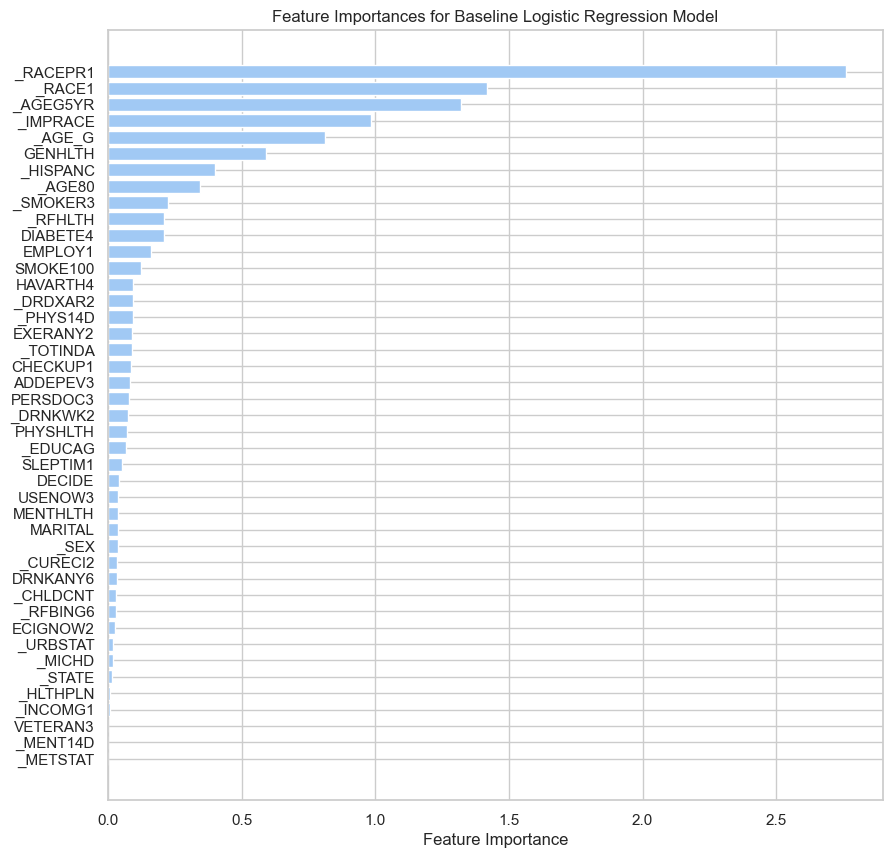

In [60]:
# Get the LogisticRegression model from the pipeline
logreg_model = pipeline_logreg.named_steps['model']

# Access the coefficients of the LogisticRegression model
coef = logreg_model.coef_[0]

# Calculating the feature importances by taking the absolute values of the coefficients
feature_importances = abs(coef)

# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 10))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Baseline Logistic Regression Model')
plt.gca().invert_yaxis() 
plt.show()

from sklearn.inspection import permutation_importance

# Get the LogisticRegression model from the pipeline
knn_model = pipeline_knn.named_steps['model']

# Calculate permutation importance
result = permutation_importance(knn_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Get the feature importances
feature_importances = result.importances_mean


# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 10))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for RFC Model')
plt.gca().invert_yaxis() 
plt.show()

GENHLTH: 0.09830229048515436
_STATE: 0.07300151947322277
_AGE80: 0.07163654615760129
SLEPTIM1: 0.060821409366793915
_AGEG5YR: 0.052328813483914265
_EDUCAG: 0.05135187766646995
_INCOMG1: 0.05079859394680553
_DRNKWK2: 0.04621597747960757
MARITAL: 0.02992926097866576
_AGE_G: 0.029219380341391314
MENTHLTH: 0.02911300317722828
PHYSHLTH: 0.028682892773397386
EMPLOY1: 0.02804405462308295
PERSDOC3: 0.025685855613737353
DIABETE4: 0.02444461757753247
_CHLDCNT: 0.022237437205216377
_SMOKER3: 0.020910772550901475
CHECKUP1: 0.020049185797402003
_SEX: 0.016260224770752653
_MENT14D: 0.01564887471559995
_PHYS14D: 0.015528886061542338
ECIGNOW2: 0.013944112683518686
_METSTAT: 0.013304981970424002
DRNKANY6: 0.012169784570329299
_RACEPR1: 0.012008197140252778
_IMPRACE: 0.011954598460248768
_RACE1: 0.011839694245810382
ADDEPEV3: 0.011431174071481672
SMOKE100: 0.010737287668944826
VETERAN3: 0.009199205038589823
_URBSTAT: 0.00863851952126469
_TOTINDA: 0.008288984520063021
HAVARTH4: 0.008165745447097418
_RFHL

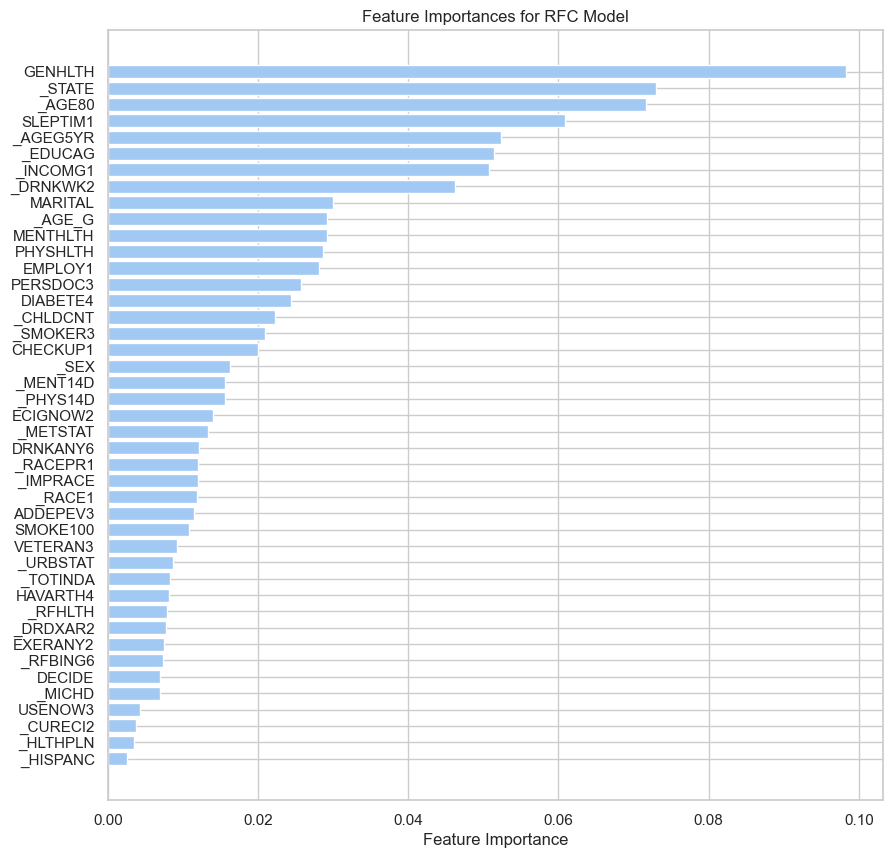

In [70]:
# Get the rfc model from the pipeline
rfc_model = pipeline_rfc.named_steps['model']

# Access the feature importances
feature_importances = rfc_model.feature_importances_

# Getting the feature names 
feature_names = ['_STATE', '_SEX', '_AGEG5YR', '_AGE80', '_AGE_G', 'MARITAL','_EDUCAG', '_INCOMG1', 
            'VETERAN3', 'EMPLOY1', '_CHLDCNT', '_METSTAT', '_URBSTAT', '_IMPRACE', '_RACE1', '_RACEPR1', '_HISPANC', 
                #Health Status/ Metrics------------------------------------------------------------------------------------
            'GENHLTH', '_RFHLTH','PHYSHLTH', '_PHYS14D',
            'MENTHLTH', '_MENT14D', 'EXERANY2', '_TOTINDA', 'SLEPTIM1', 
            '_HLTHPLN', 'PERSDOC3', 'CHECKUP1', 'ADDEPEV3', 'HAVARTH4', '_DRDXAR2', '_MICHD',  
            'DIABETE4', 'DECIDE',  
                #Tobacco use-----------------------------------------------------------------------------------------------
            '_SMOKER3','SMOKE100', 'USENOW3', 'ECIGNOW2', '_CURECI2', 
                #Alcohol consumption---------------------------------------------------------------------------------------
            'DRNKANY6', '_RFBING6', '_DRNKWK2']

# Creating a list of (feature_name, importance) pairs
feature_importance_pairs = list(zip(feature_names, feature_importances))

# Sorting the feature importances by importance in descending order
feature_importance_pairs.sort(key=lambda x: x[1], reverse=True)

# Printting feature importances
for feature, importance in feature_importance_pairs:
    print(f"{feature}: {importance}")

# Plotting feature importances 
plt.figure(figsize=(10, 10))
plt.barh([feature for feature, importance in feature_importance_pairs], 
         [importance for feature, importance in feature_importance_pairs])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for RFC Model')
plt.gca().invert_yaxis() 
plt.show()

In [116]:
# Filter feature_importance_pairs to include only features with importances greater than 0.01
filtered_features = [(feature, importance) for feature, importance in feature_importance_pairs if importance > 0.01]

# Extract feature names from filtered features
filtered_feature_names = [feature for feature, _ in filtered_features]

# Append "Obese" column to the list of filtered feature names
filtered_feature_names.append("Obese")

# Filter the DataFrame df_clean to include only the selected features
df_filtered = df_clean[filtered_feature_names]

# Display the first few rows of the filtered DataFrame
print(df_filtered.head())

   GENHLTH  _STATE  _AGE80  SLEPTIM1  _AGEG5YR  _EDUCAG  _INCOMG1  \
1      1.0     1.0    80.0       6.0      13.0      2.0       3.0   
2      2.0     1.0    56.0       5.0       8.0      4.0       6.0   
4      4.0     1.0    43.0       9.0       5.0      3.0       3.0   
6      2.0     1.0    80.0       7.0      13.0      4.0       5.0   
7      3.0     1.0    80.0       8.0      13.0      2.0       5.0   

       _DRNKWK2  MARITAL  _AGE_G  MENTHLTH  PHYSHLTH  EMPLOY1  PERSDOC3  \
1  5.397605e-79      3.0     6.0      88.0      88.0      2.0       2.0   
2  5.397605e-79      1.0     5.0       3.0       2.0      7.0       1.0   
4  1.400000e+02      1.0     3.0      88.0       2.0      5.0       2.0   
6  2.330000e+02      2.0     6.0      88.0      88.0      7.0       1.0   
7  5.397605e-79      3.0     6.0      88.0      88.0      7.0       1.0   

   DIABETE4  _CHLDCNT  _SMOKER3  CHECKUP1  _SEX  _MENT14D  _PHYS14D  ECIGNOW2  \
1       3.0       1.0       4.0       8.0   2.0      

In [117]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283957 entries, 1 to 445130
Data columns (total 30 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   GENHLTH   283957 non-null  float64
 1   _STATE    283957 non-null  float64
 2   _AGE80    283957 non-null  float64
 3   SLEPTIM1  283957 non-null  float64
 4   _AGEG5YR  283957 non-null  float64
 5   _EDUCAG   283957 non-null  float64
 6   _INCOMG1  283957 non-null  float64
 7   _DRNKWK2  283957 non-null  float64
 8   MARITAL   283957 non-null  float64
 9   _AGE_G    283957 non-null  float64
 10  MENTHLTH  283957 non-null  float64
 11  PHYSHLTH  283957 non-null  float64
 12  EMPLOY1   283957 non-null  float64
 13  PERSDOC3  283957 non-null  float64
 14  DIABETE4  283957 non-null  float64
 15  _CHLDCNT  283957 non-null  float64
 16  _SMOKER3  283957 non-null  float64
 17  CHECKUP1  283957 non-null  float64
 18  _SEX      283957 non-null  float64
 19  _MENT14D  283957 non-null  float64
 20  _PHYS14D 

In [118]:
# Splitting new df into train and test groups 
# Separating target variable from predictors
X2 = df_filtered.drop(['Obese'], axis=1)  # Features
y2 = df_filtered['Obese']  # Target variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)



# Neural Network Modeling 

In [100]:
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X, _, sample_train_y, _ = train_test_split(
    X_train, y_train, 
    train_size= percentage_to_use, 
    stratify= y_train,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X.shape)
print("Sample Train Y Shape:", sample_train_y.shape)

Sample Train X Shape: (53241, 43)
Sample Train Y Shape: (53241,)


In [107]:
# Define a function to plot training and validation curves
def plot_curves(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train'], loc='upper left')
    plt.show()

# Define a function to get evaluation metrics
def get_evaluation_metrics(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test, y_test)
    train_evaluation_results = model.evaluate(sample_train_X, sample_train_y)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [104]:
# Baseline NN with 120 epochs, batch_size 250

# Number of input features
n_features = sample_train_X.shape[1]

# Define a custom F1 score metric function using TensorFlow operations
def f1_metric(y_true, y_pred):
    y_pred = tf.round(y_pred)
    true_positives = tf.reduce_sum(tf.cast(y_true * y_pred, 'float'), axis=0)
    possible_positives = tf.reduce_sum(tf.cast(y_true, 'float'), axis=0)
    predicted_positives = tf.reduce_sum(tf.cast(y_pred, 'float'), axis=0)
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    f1 = 2 * (precision * recall) / (precision + recall + tf.keras.backend.epsilon())
    return tf.reduce_mean(f1)

# Initialize a sequential model
model = models.Sequential()

# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history = model.fit(sample_train_X,
                    sample_train_y,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics(model)

Epoch 1/120
213/213 [==============================] - 2s 2ms/step - loss: 0.9119 - accuracy: 0.6141 - f1_metric: 0.2476
Epoch 2/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.6467 - f1_metric: 0.2233
Epoch 3/120
213/213 [==============================] - 0s 2ms/step - loss: 0.6757 - accuracy: 0.6551 - f1_metric: 0.2497
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6473 - accuracy: 0.6654 - f1_metric: 0.2638
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7013 - accuracy: 0.6575 - f1_metric: 0.2776
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6298 - accuracy: 0.6709 - f1_metric: 0.2971
Epoch 7/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6749 - accuracy: 0.6691 - f1_metric: 0.3170
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6558 - accuracy: 0.6697 - f1_metric: 0.3207
Epoch 9/120
213/213 [===========

In [105]:
# Baseline NN but with additionml dense layer of 50

# Initialize a sequential model
model2 = models.Sequential()

# Two layers with relu activation
model2.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
model2.add(layers.Dense(50, activation='relu'))
model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history2 = model2.fit(sample_train_X,
                    sample_train_y,
                    epochs=120,
                    batch_size=250)

Epoch 1/120
213/213 [==============================] - 2s 3ms/step - loss: 0.8514 - accuracy: 0.6236 - f1_metric: 0.2045
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7014 - accuracy: 0.6492 - f1_metric: 0.1821
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6629 - accuracy: 0.6591 - f1_metric: 0.1821
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6775 - accuracy: 0.6579 - f1_metric: 0.2073
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6571 - accuracy: 0.6634 - f1_metric: 0.2258
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6564 - accuracy: 0.6635 - f1_metric: 0.2448
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6359 - accuracy: 0.6717 - f1_metric: 0.2661
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6284 - accuracy: 0.6734 - f1_metric: 0.2805
Epoch 9/120
213/213 [===========

In [108]:
# Evaluate the model 
get_evaluation_metrics(model2)

1664/1664 [==============================] - 4s 2ms/step - loss: 0.5624 - accuracy: 0.7084 - f1_metric: 0.4251
Test Evaluation Results: [0.6027646660804749, 0.6807860136032104, 0.3787582814693451]
Train Evaluation Results: [0.5624340176582336, 0.7084202170372009, 0.42509037256240845]
Test Loss: 0.6027646660804749
Test Accuracy: 0.6807860136032104
Test F1 Score: 0.3787582814693451
Train Loss: 0.5624340176582336
Train Accuracy: 0.7084202170372009
Train F1 Score: 0.42509037256240845


In [110]:
# Model 3
# Adjusting model 2 by balancing class weights to account for class imbalance with obesity 

from sklearn.utils.class_weight import compute_class_weight

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
model3 = models.Sequential()

# Two layers with relu activation
model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
model3.add(layers.Dense(50, activation='relu'))
model3.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history3 = model3.fit(sample_train_X,
                    sample_train_y,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict )

# Evaluate the model 
get_evaluation_metrics(model3)

Epoch 1/120
213/213 [==============================] - 2s 3ms/step - loss: 1.1593 - accuracy: 0.5215 - f1_metric: 0.4200
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7910 - accuracy: 0.5383 - f1_metric: 0.4481
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7706 - accuracy: 0.5557 - f1_metric: 0.4603
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.8014 - accuracy: 0.5619 - f1_metric: 0.4602
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7216 - accuracy: 0.5777 - f1_metric: 0.4797
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6860 - accuracy: 0.5978 - f1_metric: 0.4952
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7029 - accuracy: 0.5970 - f1_metric: 0.4944
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6841 - accuracy: 0.6031 - f1_metric: 0.5019
Epoch 9/120
213/213 [===========

# Filtered to keep feature importances greater than 0.01 from RFC model 

In [119]:
# Splitting new df into train and test groups 
# Separating target variable from predictors
X2 = df_filtered.drop(['Obese'], axis=1)  # Features
y2 = df_filtered['Obese']  # Target variable
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)


In [120]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X2, _, sample_train_y2, _ = train_test_split(
    X_train2, y_train2, 
    train_size= percentage_to_use, 
    stratify= y_train2,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X2.shape)
print("Sample Train Y Shape:", sample_train_y2.shape)

Sample Train X Shape: (53241, 29)
Sample Train Y Shape: (53241,)


In [123]:
# Define a function to get evaluation metrics
def get_evaluation_metrics_general(model, X_test, y_test, sample_train_X, sample_train_y):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test, y_test)
    train_evaluation_results = model.evaluate(sample_train_X, sample_train_y)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [124]:
# Define a function to get evaluation metrics
def get_evaluation_metrics2(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test2, y_test2)
    train_evaluation_results = model.evaluate(sample_train_X2, sample_train_y2)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [125]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset

# Number of input features
n_features = sample_train_X2.shape[1]

# Initialize a sequential model
reduced_model = models.Sequential()

# Two layers with relu activation
reduced_model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r1 = reduced_model.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics2(reduced_model)

Epoch 1/120
213/213 [==============================] - 1s 2ms/step - loss: 0.9064 - accuracy: 0.6076 - f1_metric: 0.2501
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6827 - accuracy: 0.6364 - f1_metric: 0.2208
Epoch 3/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.6470 - f1_metric: 0.2328
Epoch 4/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6979 - accuracy: 0.6488 - f1_metric: 0.2528
Epoch 5/120
213/213 [==============================] - 0s 2ms/step - loss: 0.6782 - accuracy: 0.6534 - f1_metric: 0.2648
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6611 - accuracy: 0.6576 - f1_metric: 0.2740
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6634 - accuracy: 0.6566 - f1_metric: 0.2828
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6377 - accuracy: 0.6670 - f1_metric: 0.2943
Epoch 9/120
213/213 [===========

In [126]:
# Baseline NN but with additionml dense layer of 50 on new filetered dataset
# Number of input features
n_features = sample_train_X2.shape[1]

# Initialize a sequential model
reduced_model2 = models.Sequential()

# Two layers with relu activation
reduced_model2.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model2.add(layers.Dense(50, activation='relu'))
reduced_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r2 = reduced_model2.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics2(reduced_model2)

Epoch 1/120
213/213 [==============================] - 2s 4ms/step - loss: 1.5953 - accuracy: 0.6244 - f1_metric: 0.1818
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6419 - accuracy: 0.6583 - f1_metric: 0.1190
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6441 - accuracy: 0.6604 - f1_metric: 0.1488
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6278 - accuracy: 0.6653 - f1_metric: 0.1822
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6255 - accuracy: 0.6693 - f1_metric: 0.2167
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6265 - accuracy: 0.6697 - f1_metric: 0.2337
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6202 - accuracy: 0.6718 - f1_metric: 0.2567
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6202 - accuracy: 0.6705 - f1_metric: 0.2639
Epoch 9/120
213/213 [===========

In [127]:
# Baseline NN but with additionml dense layer of 50 on new filetered dataset
# Also additional of class weights computation


# Number of input features
n_features = sample_train_X2.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train2), y=y_train2)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
reduced_model3 = models.Sequential()

# Two layers with relu activation
reduced_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model3.add(layers.Dense(50, activation='relu'))
reduced_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r3 = reduced_model3.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics2(reduced_model3)

Epoch 1/120
213/213 [==============================] - 1s 2ms/step - loss: 0.9600 - accuracy: 0.5089 - f1_metric: 0.4091
Epoch 2/120
213/213 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.5361 - f1_metric: 0.4378
Epoch 3/120
213/213 [==============================] - 1s 2ms/step - loss: 0.8308 - accuracy: 0.5490 - f1_metric: 0.4576
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.7841 - accuracy: 0.5598 - f1_metric: 0.4663
Epoch 5/120
213/213 [==============================] - 0s 2ms/step - loss: 0.7912 - accuracy: 0.5739 - f1_metric: 0.4802
Epoch 6/120
213/213 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.5770 - f1_metric: 0.4769
Epoch 7/120
213/213 [==============================] - 0s 2ms/step - loss: 0.8110 - accuracy: 0.5774 - f1_metric: 0.4746
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.7438 - accuracy: 0.5881 - f1_metric: 0.4908
Epoch 9/120
213/213 [===========

In [ ]:
# Baseline NN but with additionml dense layer of 50 on new filetered dataset
# Also additional of class weights computation


# Number of input features
n_features = sample_train_X2.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train2), y=y_train2)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
reduced_model3 = models.Sequential()

# Two layers with relu activation
reduced_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
reduced_model3.add(layers.Dense(50, activation='relu'))
reduced_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
reduced_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
reduced_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_r3 = reduced_model3.fit(sample_train_X2,
                    sample_train_y2,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics2(reduced_model3)

# NN with standard scaling

In [131]:
# Splitting new df into train and test groups 
# Separating target variable from predictors
X3 = df_filtered.drop(['Obese'], axis=1)  # Features
y3 = df_filtered['Obese']  # Target variable
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=42)

In [132]:
# Set the seed for reproducibility
np.random.seed(42)

# Define the percentage of the original training set to use
percentage_to_use = 0.25 

# Split the original training set into a smaller subset
sample_train_X3, _, sample_train_y3, _ = train_test_split(
    X_train3, y_train3, 
    train_size= percentage_to_use, 
    stratify= y_train3,  # Maintain class distribution
    random_state=42   # Set random seed for reproducibility
)

# Print the shape of the new subset
print("Sample Train X Shape:", sample_train_X3.shape)
print("Sample Train Y Shape:", sample_train_y3.shape)

Sample Train X Shape: (53241, 29)
Sample Train Y Shape: (53241,)


In [133]:
# Instantiate StandardScaler
ss_X = StandardScaler()

# Fit and transform the training data
sample_X_train3_scaled = ss_X.fit_transform(sample_train_X3)
X_train3_scaled = ss_X.fit_transform(X_train3)

# Transform test data
X_test3_scaled = ss_X.transform(X_test3)

In [134]:
# Define a function to get evaluation metrics
def get_evaluation_metrics3(model):

    # Evaluate the model 
    test_evaluation_results = model.evaluate(X_test3_scaled, y_test3)
    train_evaluation_results = model.evaluate(X_train3_scaled, y_train3)

    # Print all evaluation results
    print("Test Evaluation Results:", test_evaluation_results)
    print("Train Evaluation Results:", train_evaluation_results)

    # Access specific values
    test_loss = test_evaluation_results[0]
    test_acc = test_evaluation_results[1]
    test_f1 = test_evaluation_results[2]
    train_loss = train_evaluation_results[0]
    train_acc = train_evaluation_results[1]
    train_f1 = train_evaluation_results[2]


    # Print specific values
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_acc)
    print("Test F1 Score:", test_f1)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_acc)
    print("Train F1 Score:", train_f1)

In [135]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset

# Number of input features
n_features = sample_train_X3.shape[1]

# Initialize a sequential model
scaled_model = models.Sequential()

# Two layers with relu activation
scaled_model.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s1 = scaled_model.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics3(scaled_model)

Epoch 1/120
213/213 [==============================] - 1s 2ms/step - loss: 0.6240 - accuracy: 0.6571 - f1_metric: 0.2538
Epoch 2/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5922 - accuracy: 0.6848 - f1_metric: 0.3124
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5871 - accuracy: 0.6888 - f1_metric: 0.3440
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5841 - accuracy: 0.6913 - f1_metric: 0.3587
Epoch 5/120
213/213 [==============================] - 0s 2ms/step - loss: 0.5818 - accuracy: 0.6937 - f1_metric: 0.3718
Epoch 6/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.6940 - f1_metric: 0.3732
Epoch 7/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5786 - accuracy: 0.6961 - f1_metric: 0.3872
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5777 - accuracy: 0.6970 - f1_metric: 0.3900
Epoch 9/120
213/213 [===========

In [136]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50

# Number of input features
n_features = sample_train_X3.shape[1]

# Initialize a sequential model
scaled_model2 = models.Sequential()

# Two layers with relu activation
scaled_model2.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model2.add(layers.Dense(50, activation='relu'))
scaled_model2.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model2.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model2.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s2 = scaled_model2.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=250)

# Evaluate the model 
get_evaluation_metrics3(scaled_model2)

Epoch 1/120
213/213 [==============================] - 2s 2ms/step - loss: 0.6050 - accuracy: 0.6774 - f1_metric: 0.2588
Epoch 2/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5899 - accuracy: 0.6874 - f1_metric: 0.3431
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5856 - accuracy: 0.6904 - f1_metric: 0.3625
Epoch 4/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5824 - accuracy: 0.6932 - f1_metric: 0.3723
Epoch 5/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5807 - accuracy: 0.6931 - f1_metric: 0.3754
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.5781 - accuracy: 0.6963 - f1_metric: 0.3876
Epoch 7/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5766 - accuracy: 0.6971 - f1_metric: 0.3913
Epoch 8/120
213/213 [==============================] - 1s 2ms/step - loss: 0.5747 - accuracy: 0.6984 - f1_metric: 0.4004
Epoch 9/120
213/213 [===========

In [137]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Two layers with relu activation
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=250, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
213/213 [==============================] - 2s 3ms/step - loss: 0.6564 - accuracy: 0.6096 - f1_metric: 0.5091
Epoch 2/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6401 - accuracy: 0.6313 - f1_metric: 0.5346
Epoch 3/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6343 - accuracy: 0.6378 - f1_metric: 0.5436
Epoch 4/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6303 - accuracy: 0.6408 - f1_metric: 0.5479
Epoch 5/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6280 - accuracy: 0.6429 - f1_metric: 0.5503
Epoch 6/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6254 - accuracy: 0.6450 - f1_metric: 0.5525
Epoch 7/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6241 - accuracy: 0.6471 - f1_metric: 0.5553
Epoch 8/120
213/213 [==============================] - 1s 3ms/step - loss: 0.6223 - accuracy: 0.6482 - f1_metric: 0.5562
Epoch 9/120
213/213 [===========

In [ ]:
# Baseline NN with 120 epochs, batch_size 250 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Two layers with relu activation
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dense(25, activation='relu'))

# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model3.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

In [138]:
# Adding drop out layers

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed

# Output layer
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
scaled_model3.compile(optimizer='Adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 7s 7ms/step - loss: 0.6710 - accuracy: 0.5803 - f1_metric: 0.4834
Epoch 2/120
533/533 [==============================] - 3s 5ms/step - loss: 0.6538 - accuracy: 0.6126 - f1_metric: 0.5147
Epoch 3/120
533/533 [==============================] - 4s 7ms/step - loss: 0.6475 - accuracy: 0.6175 - f1_metric: 0.5243
Epoch 4/120
533/533 [==============================] - 3s 6ms/step - loss: 0.6450 - accuracy: 0.6253 - f1_metric: 0.5283
Epoch 5/120
533/533 [==============================] - 3s 5ms/step - loss: 0.6425 - accuracy: 0.6270 - f1_metric: 0.5316
Epoch 6/120
533/533 [==============================] - 3s 6ms/step - loss: 0.6406 - accuracy: 0.6296 - f1_metric: 0.5331
Epoch 7/120
533/533 [==============================] - 2s 4ms/step - loss: 0.6393 - accuracy: 0.6314 - f1_metric: 0.5341
Epoch 8/120
533/533 [==============================] - 3s 6ms/step - loss: 0.6386 - accuracy: 0.6328 - f1_metric: 0.5391
Epoch 9/120
533/533 [===========

In [140]:
from tensorflow.keras import optimizers



# Baseline NN with 120 epochs, batch_size 100 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50
# adjustign learning rate

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with a custom optimizer with a lower learning rate
custom_optimizer = optimizers.Adam(lr=0.0001) 
scaled_model3.compile(optimizer=custom_optimizer,
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 3s 3ms/step - loss: 0.6741 - accuracy: 0.5938 - f1_metric: 0.4694
Epoch 2/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6538 - accuracy: 0.6055 - f1_metric: 0.5160
Epoch 3/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6477 - accuracy: 0.6120 - f1_metric: 0.5283
Epoch 4/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6448 - accuracy: 0.6258 - f1_metric: 0.5287
Epoch 5/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6435 - accuracy: 0.6229 - f1_metric: 0.5317
Epoch 6/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6424 - accuracy: 0.6241 - f1_metric: 0.5337
Epoch 7/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6413 - accuracy: 0.6277 - f1_metric: 0.5358
Epoch 8/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6381 - accuracy: 0.6296 - f1_metric: 0.5394
Epoch 9/120
533/533 [===========

In [141]:
# Baseline NN with 120 epochs, batch_size 100 with new filtered dataset
# Scaled data
# Adding additional dense layer of 50
# SGD optmizer

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
scaled_model3.compile(optimizer= 'SGD',
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_X_train3_scaled,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 2s 3ms/step - loss: 0.7032 - accuracy: 0.5022 - f1_metric: 0.4316
Epoch 2/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6862 - accuracy: 0.5621 - f1_metric: 0.4445
Epoch 3/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6804 - accuracy: 0.5798 - f1_metric: 0.4517
Epoch 4/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6745 - accuracy: 0.5905 - f1_metric: 0.4632
Epoch 5/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6723 - accuracy: 0.5969 - f1_metric: 0.4696
Epoch 6/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6693 - accuracy: 0.5969 - f1_metric: 0.4782
Epoch 7/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6672 - accuracy: 0.6039 - f1_metric: 0.4825
Epoch 8/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6659 - accuracy: 0.6027 - f1_metric: 0.4917
Epoch 9/120
533/533 [===========

In [142]:
# Baseline NN with 120 epochs, batch_size 100 with new filtered dataset
# Adding additional dense layer of 50
# SGD optimizer with no x scaled train data in training model, only x train sampled

# Number of input features
n_features = sample_train_X3.shape[1]

# Balancing class weights to account for class imbalance

class_weights = compute_class_weight('balanced', classes=np.unique(y_train3), y=y_train3)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

# Initialize a sequential model
scaled_model3 = models.Sequential()

# Add dropout layers after each dense layer
scaled_model3.add(layers.Dense(50, activation='relu', input_shape=(n_features,)))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(50, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
scaled_model3.add(layers.Dense(25, activation='relu'))
scaled_model3.add(layers.Dropout(0.2))  # Adjust dropout rate as needed
# One layer with sigmoid activation 
scaled_model3.add(layers.Dense(1, activation='sigmoid'))

# Compile the model with SGD optimizer
scaled_model3.compile(optimizer= 'SGD',
                      loss='binary_crossentropy',
                      metrics=['accuracy', f1_metric])

# Train the model 
history_s3 = scaled_model3.fit(sample_train_X3,
                    sample_train_y3,
                    epochs=120,
                    batch_size=100, 
                    class_weight=class_weights_dict)

# Evaluate the model 
get_evaluation_metrics3(scaled_model3)

Epoch 1/120
533/533 [==============================] - 2s 2ms/step - loss: 0.8648 - accuracy: 0.5078 - f1_metric: 0.4094
Epoch 2/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6942 - accuracy: 0.5478 - f1_metric: 0.3974
Epoch 3/120
533/533 [==============================] - 1s 2ms/step - loss: 0.6915 - accuracy: 0.5842 - f1_metric: 0.3735
Epoch 4/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5839 - f1_metric: 0.3783
Epoch 5/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6906 - accuracy: 0.5950 - f1_metric: 0.3720
Epoch 6/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6914 - accuracy: 0.5939 - f1_metric: 0.3670
Epoch 7/120
533/533 [==============================] - 1s 3ms/step - loss: 0.6907 - accuracy: 0.5898 - f1_metric: 0.3721
Epoch 8/120
533/533 [==============================] - 2s 3ms/step - loss: 0.6903 - accuracy: 0.5919 - f1_metric: 0.3717
Epoch 9/120
533/533 [===========